# Prediction of teams that will reach the Playoffs

## Data Import

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
! pip install tabulate
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

players = pd.read_csv('basketballPlayoffs/players.csv', delimiter=",")
coaches = pd.read_csv('basketballPlayoffs/coaches.csv', delimiter=",")
teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")
players_teams = pd.read_csv('basketballPlayoffs/players_teams.csv', delimiter=",")
teams_post = pd.read_csv('basketballPlayoffs/teams_post.csv', delimiter=",")
series_post = pd.read_csv('basketballPlayoffs/series_post.csv', delimiter=",")
awards_players = pd.read_csv('basketballPlayoffs/awards_players.csv', delimiter=",")
awards_coaches = pd.read_csv('basketballPlayoffs/awards_coaches.csv', delimiter=",")

print(players.head())
print(coaches)
print(teams)
print(players_teams)
print(teams_post)
print(series_post)
print(awards_players)
print(awards_coaches)

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05-24  0000-00-00  
        coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0    ad

## Data cleaning

Check for missing values, outliers, and inconsistencies in the data. Clean and preprocess the data to ensure it's ready for analysis.

### Teams dataset

In [60]:
print(teams.isna().sum())
print(teams.head())

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64
   year  lgID tmID franchID confID  divID  rank playoff  seeded firstRound   
0     9  WNBA  ATL      ATL     EA    NaN     7       N       0        NaN  \
1    10  WNBA  ATL      ATL     EA    NaN     2       Y       0          L   
2     1  WNBA  CHA      CHA     EA    NaN     8       N       0        NaN   
3     2  WNBA  CHA      CHA     EA    NaN     4       Y       0          W   
4     3  WNBA  CHA      CHA     EA    NaN     2       Y       0          L   

   ...  GP homeW homeL  awayW  awayL  confW  confL   min  attend   
0  ...  34     1    16      3     14      2     18  6825  141379  \
1  ...  34    12     5      6     11     10     12  6950  120737   
2  ...  32     5    11      3     13      5     16  6475   90963   
3  ...  32    11     5      7      9     15      6  6500  105525   
4  ...  32  

### Players Teams dataset

In [61]:
print(players_teams.isna().sum())
print(players_teams.head())

playerID              0
year                  0
stint                 0
tmID                  0
lgID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           0
PostSteals            0
PostBlocks            0
PostTurnovers         0
PostPF                0
PostfgAttempted       0
PostfgMade            0
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
PostthreeMade   

### Players dataset

In [62]:
print(players.isna().sum())
print(players.head())

playerID          0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64
     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05

### Coaches dataset

In [63]:
print(coaches.isna().sum())
print(coaches.head())

coachID        0
year           0
tmID           0
lgID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64
      coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0  adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1  adubari99w     1  NYL  WNBA      0   20    12          4            3
2  adubari99w     2  NYL  WNBA      0   21    11          3            3
3  adubari99w     3  NYL  WNBA      0   18    14          4            4
4  adubari99w     4  NYL  WNBA      0   16    18          0            0


### Awards Players dataset

In [64]:
print(awards_players.isna().sum())
print(awards_players.head())

playerID    0
award       0
year        0
lgID        0
dtype: int64
     playerID                               award  year  lgID
0  thompti01w  All-Star Game Most Valuable Player     1  WNBA
1  leslili01w  All-Star Game Most Valuable Player     2  WNBA
2  leslili01w  All-Star Game Most Valuable Player     3  WNBA
3  teaslni01w  All-Star Game Most Valuable Player     4  WNBA
4  swoopsh01w  All-Star Game Most Valuable Player     6  WNBA


### Awards Coaches dataset

In [65]:
print(awards_coaches.isna().sum())
print(awards_coaches.head())

coachID    0
award      0
year       0
lgID       0
dtype: int64
      coachID              award  year  lgID
0  coopemi01w  Coach of the Year     1  WNBA
1  hugheda99w  Coach of the Year     2  WNBA
2  stanlma99w  Coach of the Year     3  WNBA
3  laimbbi01w  Coach of the Year     4  WNBA
4  mcconsu01w  Coach of the Year     5  WNBA


## Exploratory Data Analysis (EDA)

Conduct EDA to gain insights into the data. Visualize distributions, correlations, and patterns. This step will help you understand the relationships between different features and the target variable.

### Teams metrics

In [66]:
teams.head()

teams.isnull().sum()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64

In [67]:
for column in teams.columns:
    unique_values = teams[column].unique()
    print(f"Number of different values in the {column} column are:", len(unique_values))
    print("------------")

Number of different values in the year column are: 10
------------
Number of different values in the lgID column are: 1
------------
Number of different values in the tmID column are: 20
------------
Number of different values in the franchID column are: 18
------------
Number of different values in the confID column are: 2
------------
Number of different values in the divID column are: 1
------------
Number of different values in the rank column are: 8
------------
Number of different values in the playoff column are: 2
------------
Number of different values in the seeded column are: 1
------------
Number of different values in the firstRound column are: 3
------------
Number of different values in the semis column are: 3
------------
Number of different values in the finals column are: 3
------------
Number of different values in the name column are: 20
------------
Number of different values in the o_fgm column are: 116
------------
Number of different values in the o_fga column a

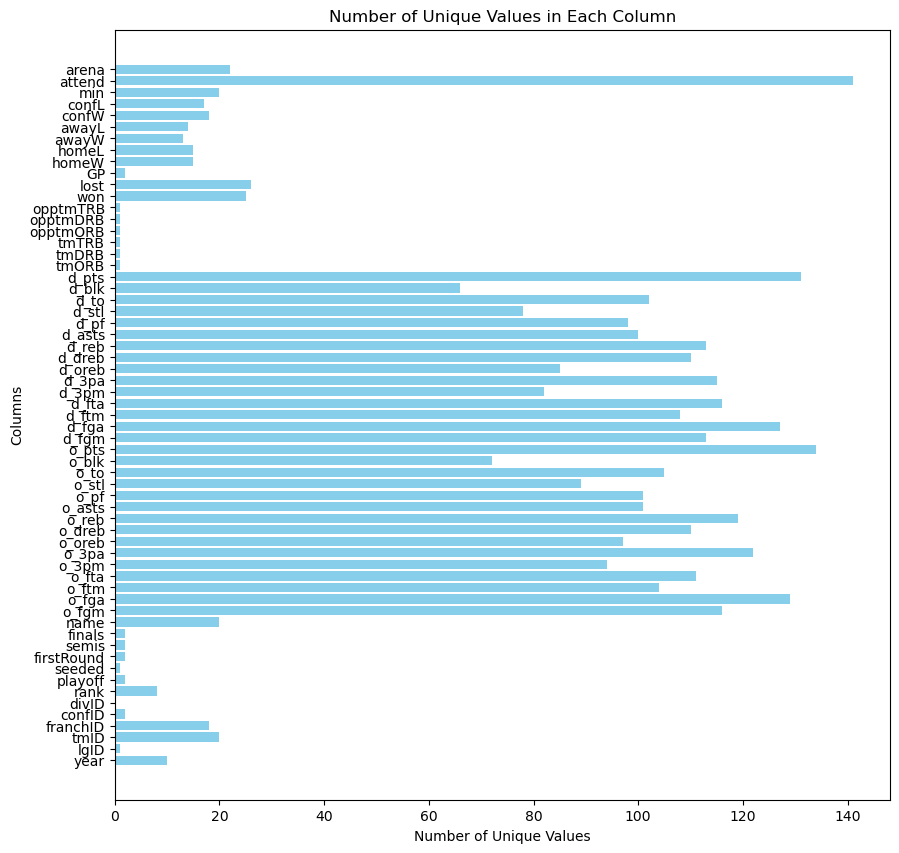

In [68]:
columns = []
value_counts = []

for column in teams.columns:
    unique_values = teams[column].nunique()
    columns.append(column)
    value_counts.append(unique_values)

plt.figure(figsize=(10, 10))
plt.barh(columns, value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()

In [69]:
print(teams.dtypes)

year         int64
lgID        object
tmID        object
franchID    object
confID      object
             ...  
confW        int64
confL        int64
min          int64
attend       int64
arena       object
Length: 61, dtype: object


In [70]:
teams_numeric = teams.copy()

for column in teams_numeric.columns:
    if teams_numeric[column].dtype == 'object':
        teams_numeric[column] = teams_numeric[column].astype('category').cat.codes

teams_numeric.describe()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
count,142.000000,142.0,142.000000,142.000000,142.000000,0.0,142.000000,142.000000,142.0,142.00000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.302817,0.0,10.070423,9.415493,0.507042,NaN,4.084507,0.563380,0.0,-0.15493,...,33.323944,10.169014,6.492958,6.492958,10.169014,10.563380,10.563380,6735.683099,141050.253521,10.838028
std,2.917274,0.0,5.426031,4.906564,0.501720,NaN,2.095226,0.497722,0.0,0.83620,...,0.949425,2.994017,2.967308,2.702104,2.731409,3.485461,3.485461,197.851093,34714.358519,6.565153
min,1.000000,0.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.0,-1.00000,...,32.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,6400.000000,57635.000000,0.000000
25%,3.000000,0.0,6.000000,5.000000,0.000000,NaN,2.000000,0.000000,0.0,-1.00000,...,32.000000,8.000000,4.250000,5.000000,9.000000,8.000000,8.000000,6500.000000,120897.500000,6.000000
50%,5.000000,0.0,10.000000,10.000000,1.000000,NaN,4.000000,1.000000,0.0,0.00000,...,34.000000,11.000000,6.000000,6.000000,10.000000,11.000000,10.000000,6825.000000,135895.500000,10.000000
75%,8.000000,0.0,15.000000,14.000000,1.000000,NaN,6.000000,1.000000,0.0,1.00000,...,34.000000,12.000000,8.000000,8.000000,12.000000,13.000000,13.000000,6875.000000,150441.500000,16.000000
max,10.000000,0.0,19.000000,17.000000,1.000000,NaN,8.000000,1.000000,0.0,1.00000,...,34.000000,16.000000,16.000000,13.000000,16.000000,19.000000,19.000000,7025.000000,259237.000000,21.000000


In [71]:
def correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()

    target_correlation = corr_matrix['playoff']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

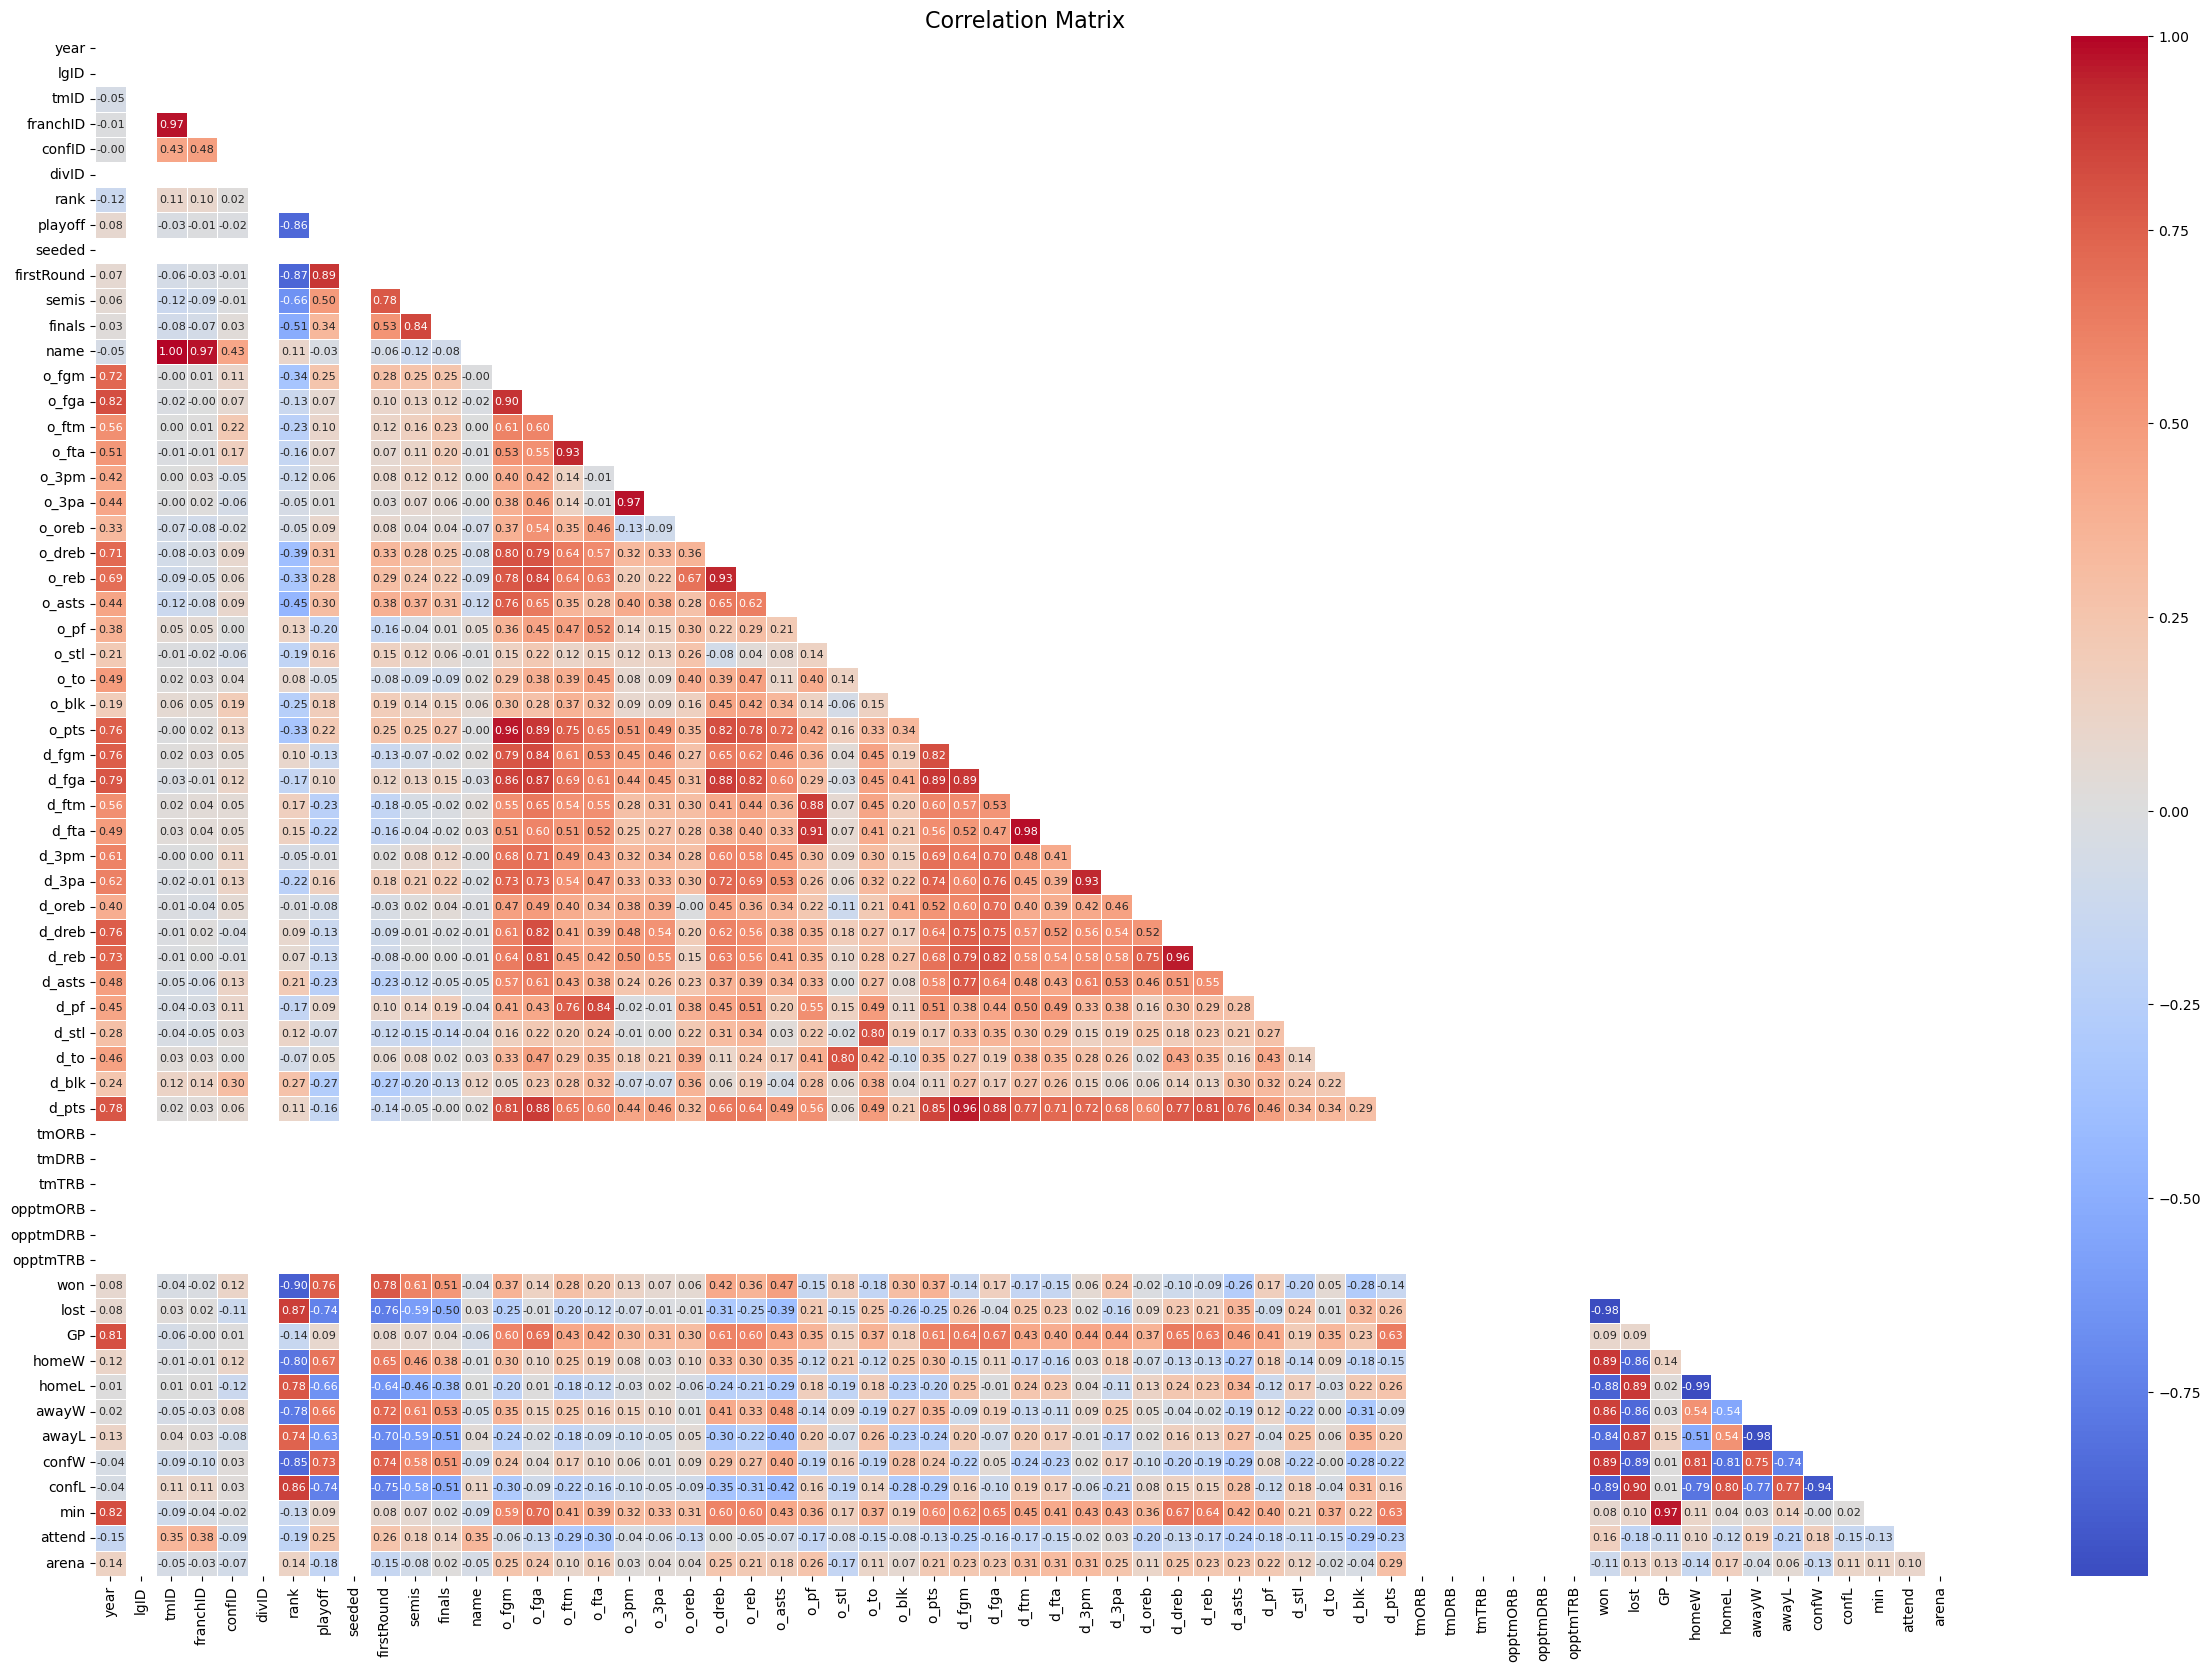

Correlation between target and year: 0.07705063246068848
Correlation between target and lgID: nan
Correlation between target and tmID: -0.02529934329892212
Correlation between target and franchID: -0.0065036191928241486
Correlation between target and confID: -0.016000512024577127
Correlation between target and divID: nan
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and seeded: nan
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and name: -0.02529934329892215
Correlation between target and o_fgm: 0.2515792808650922
Correlation between target and o_fga: 0.07084000425330679
Correlation between target and o_ftm: 0.1047223173119909
Correlation between target and o_fta: 0.0724933405057681
Correlation between target and o_3pm: 0.060612269288855054
Correlation 

{'year': 0.07705063246068848,
 'lgID': nan,
 'tmID': -0.02529934329892212,
 'franchID': -0.0065036191928241486,
 'confID': -0.016000512024577127,
 'divID': nan,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'seeded': nan,
 'firstRound': 0.892828570971414,
 'semis': 0.4970630193302927,
 'finals': 0.336817912482514,
 'name': -0.02529934329892215,
 'o_fgm': 0.2515792808650922,
 'o_fga': 0.07084000425330679,
 'o_ftm': 0.1047223173119909,
 'o_fta': 0.0724933405057681,
 'o_3pm': 0.060612269288855054,
 'o_3pa': 0.007957559282677005,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'o_reb': 0.2794116621840806,
 'o_asts': 0.3032475605334074,
 'o_pf': -0.2029192427184587,
 'o_stl': 0.1648824091126278,
 'o_to': -0.051552794336507696,
 'o_blk': 0.17871539023127894,
 'o_pts': 0.2213991839184398,
 'd_fgm': -0.1300557721536696,
 'd_fga': 0.10293846565632093,
 'd_ftm': -0.23395831262583386,
 'd_fta': -0.2196777440462202,
 'd_3pm': -0.00932954576569799,
 'd_3pa': 0.15591906469556485,
 

In [72]:
correlation_matrix(teams_numeric)

In [73]:
def chi_square(dataset, target): 
    for feature in dataset.columns:
        if feature != target:
            contingency_table = pd.crosstab(dataset[feature], dataset[target])

            # check if any category has no data
            if contingency_table.shape[0] == 0 or contingency_table.shape[1] == 0:
                print(f"No data for {feature} and {target}")
                continue
            
            chi2, p, observed, expected = chi2_contingency(contingency_table)
            
            # Step 4: Print or store the results
            print(f"Chi-square test for {feature} and {target}:")
            print(f"Chi-square value: {chi2}")
            print(f"P-value: {p}")
            print("")

In [74]:
chi_square(teams, 'playoff')

Chi-square test for year and playoff:
Chi-square value: 1.3666430343849703
P-value: 0.9980204687073957

Chi-square test for lgID and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for tmID and playoff:
Chi-square value: 32.49763248847927
P-value: 0.027449727442441722

Chi-square test for franchID and playoff:
Chi-square value: 29.671265360983107
P-value: 0.028815606896854487

Chi-square test for confID and playoff:
Chi-square value: 0.00046010944700461995
P-value: 0.9828865593186417

No data for divID and playoff
Chi-square test for rank and playoff:
Chi-square value: 142.0
P-value: 1.9364424317003396e-27

Chi-square test for seeded and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for firstRound and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for semis and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for finals and playoff:
Chi-square value: 0.0
P-value: 1.0

Chi-square test for name and playoff:
Chi-square value: 32.497632

The p-value indicates the probability of observing a relationship as extreme as the one in our sample data, assuming that there is no actual relationship in the population.

### Players metrics

In [75]:
print(players['playerID'].nunique()) 

print(players.head())

players.isnull().sum()

893
     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05-24  0000-00-00  


playerID          0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64

#### Erased columns and why

In [76]:
# Dropped columns: 'collegeOther', 'deathDate', 'firstseason', 'lastseason'

# Count the rows where 'firstseason' is not equal to 0
non_zero_firstseason_count = len(players[players['firstseason'] != 0])

# Count the rows where 'firstseason' is not equal to 0
non_zero_lastseason_count = len(players[players['lastseason'] != 0])

# Count the rows where 'deathDate' is not equal to "0000-00-00"
players['deathDate'] = players['deathDate'].str.strip()
non_empty_deathDate_count = len(players[players['deathDate'] != "0000-00-00"])

# Count the rows where 'collegeOther' is not equal to ""
non_nan_collegeOther_count = players['collegeOther'].notna().sum()

print("Number of rows with 'firstseason' different from 0:", non_zero_firstseason_count)
print("Number of rows with 'lastseason' different from 0:", non_zero_lastseason_count)
print("Number of rows with 'collegeOther' different from "":", non_nan_collegeOther_count)
print("Number of rows with 'deathDate' different from '0000-00-00':", non_empty_deathDate_count)

Number of rows with 'firstseason' different from 0: 0
Number of rows with 'lastseason' different from 0: 0
Number of rows with 'collegeOther' different from : 11
Number of rows with 'deathDate' different from '0000-00-00': 4


#### Players heights comparison

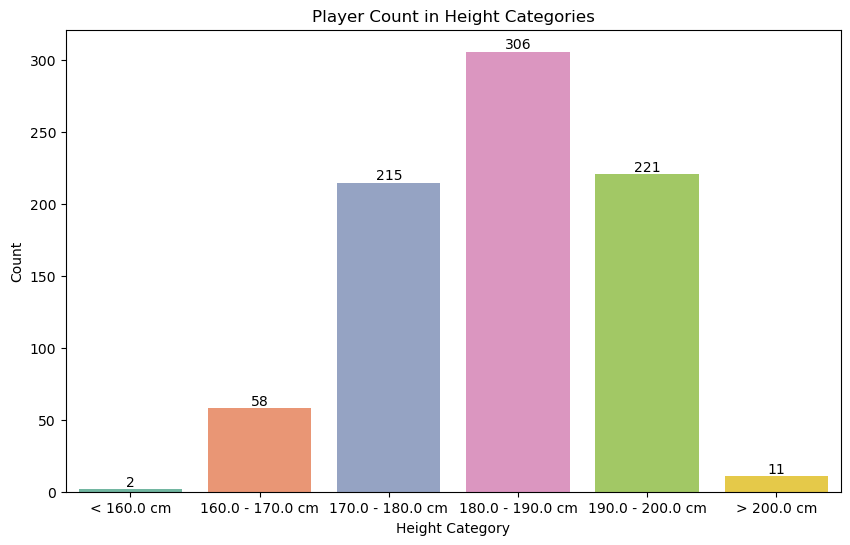

In [77]:
# Convert height from inches to centimeters
players['height_cm'] = players['height'] * 2.54  # 1 inch = 2.54 cm

# Define height categories in centimeters
height_categories = ['< 160.0 cm', '160.0 - 170.0 cm', '170.0 - 180.0 cm', '180.0 - 190.0 cm', '190.0 - 200.0 cm', '> 200.0 cm']

# Define the height ranges for each category
height_ranges = [(0, 160.0), (160.0, 170.0), (170.0, 180.0), (180.0, 190.0), (190.0, 200.0), (200.0, float('inf'))]

# Create a new column in the dataset to store the height category for each player
players['height_category'] = pd.cut(players['height_cm'], bins=[r[0] for r in height_ranges] + [float('inf')], labels=height_categories)

# Count the number of players in each height category
height_category_counts = players['height_category'].value_counts().reindex(height_categories, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=height_category_counts.index, y=height_category_counts.values, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Player Count in Height Categories')
plt.xlabel('Height Category')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Number of players in each position

Number of rows with empty 'pos': 78


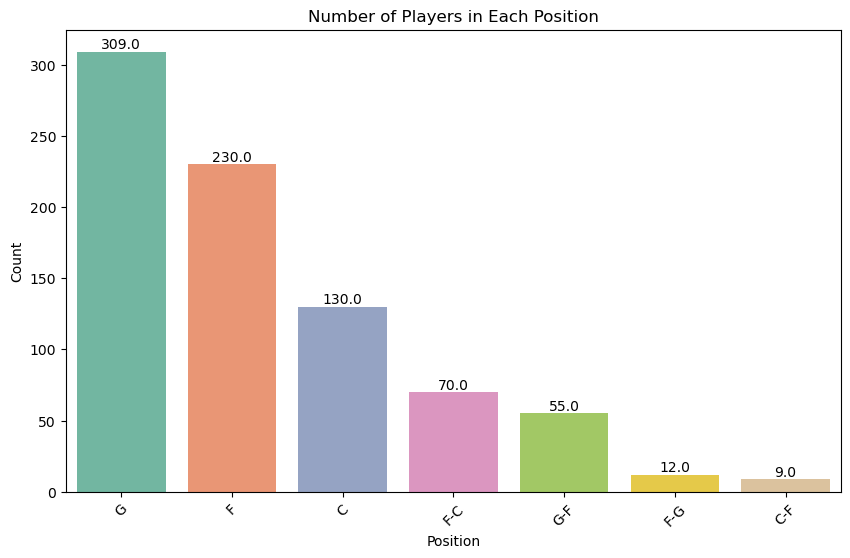

In [78]:
# Create a countplot for player positions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=players, x='pos', order=players['pos'].value_counts().index, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

empty_pos_count = players['pos'].isnull().sum()
print("Number of rows with empty 'pos':", empty_pos_count)

# Show the plot
plt.show()

#### Top 10 Colleges

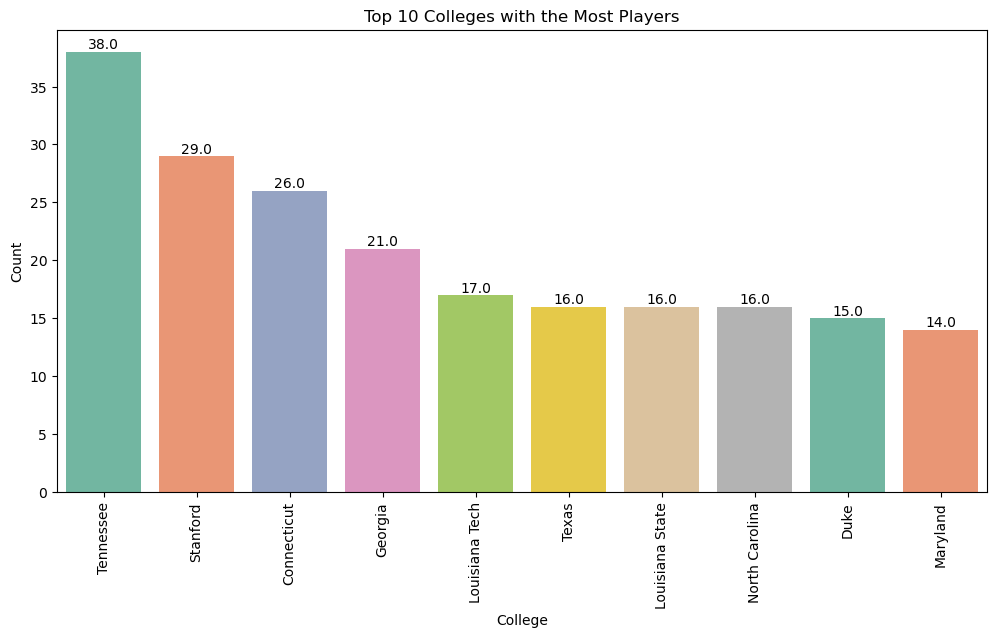

In [79]:
# Get the top 10 colleges with the most players
top_10_colleges = players['college'].value_counts().iloc[:10]

# Create a countplot for the top 10 colleges
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=players, x='college', order=top_10_colleges.index, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Top 10 Colleges with the Most Players')
plt.xlabel('College')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Correlation Matrix between numeric columns

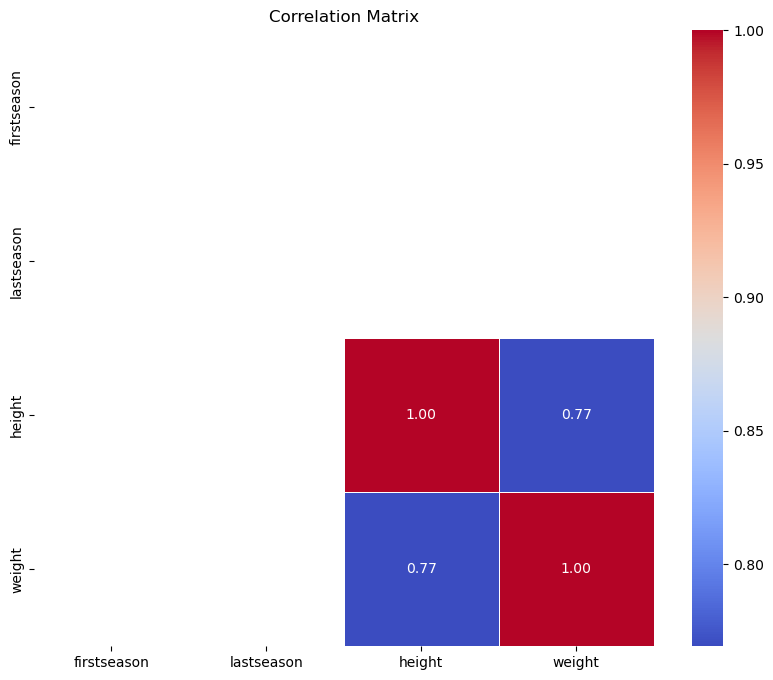

In [80]:
# Select the columns for correlation analysis
numeric_columns = ["firstseason", "lastseason", "height", "weight"]

# Create a subset of the dataset with only the numeric columns
subset = players[numeric_columns]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Teams Post metrics

In [81]:
print(teams_post.head())

teams_post.isnull().sum()

   year tmID  lgID  W  L
0     1  HOU  WNBA  6  0
1     1  ORL  WNBA  1  2
2     1  CLE  WNBA  3  3
3     1  WAS  WNBA  0  2
4     1  NYL  WNBA  4  3


year    0
tmID    0
lgID    0
W       0
L       0
dtype: int64

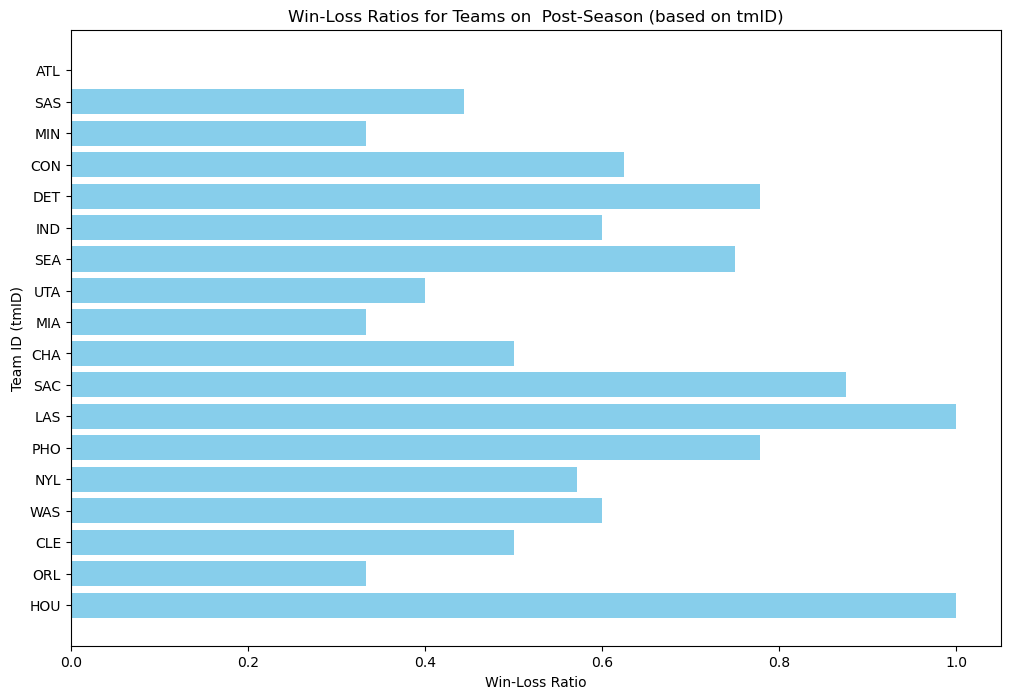

In [82]:
# Calculate win-loss ratios
teams_post['Win-Loss Ratio'] = teams_post['W'] / (teams_post['W'] + teams_post['L'])

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(teams_post['tmID'], teams_post['Win-Loss Ratio'], color='skyblue')

# Add labels and title
plt.xlabel('Win-Loss Ratio')
plt.ylabel('Team ID (tmID)')
plt.title('Win-Loss Ratios for Teams on  Post-Season (based on tmID)')

# Show the chart
plt.show()

### Series Post metrics

<Figure size 1200x800 with 0 Axes>

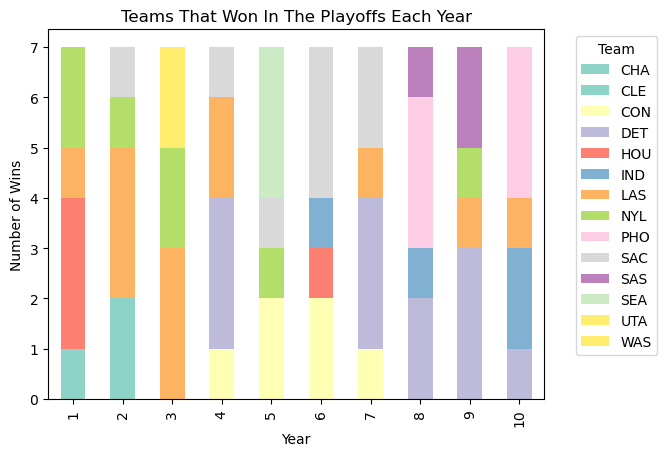

In [83]:
# Group the data by year and count the number of wins for each team in each year
team_wins_by_year = series_post.groupby(['year', 'tmIDWinner'])['W'].count().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
team_wins_by_year.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Teams That Won In The Playoffs Each Year')

# Show the chart
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Teams that won and lost each year

In [84]:
# Filter for the "F" (Finals) round
finals_data = series_post[series_post['round'] == 'F']

# Create a DataFrame with the winning and losing teams for each year
finals_results = finals_data[['year', 'tmIDWinner', 'tmIDLoser']]

# Convert the DataFrame to a prettily formatted table
table = tabulate(finals_results, headers='keys', tablefmt='fancy_grid', showindex=False)

# Display the formatted table
print(table)

╒════════╤══════════════╤═════════════╕
│   year │ tmIDWinner   │ tmIDLoser   │
╞════════╪══════════════╪═════════════╡
│      1 │ HOU          │ NYL         │
├────────┼──────────────┼─────────────┤
│      2 │ LAS          │ CHA         │
├────────┼──────────────┼─────────────┤
│      3 │ LAS          │ NYL         │
├────────┼──────────────┼─────────────┤
│      4 │ DET          │ LAS         │
├────────┼──────────────┼─────────────┤
│      5 │ SEA          │ CON         │
├────────┼──────────────┼─────────────┤
│      6 │ SAC          │ CON         │
├────────┼──────────────┼─────────────┤
│      7 │ DET          │ SAC         │
├────────┼──────────────┼─────────────┤
│      8 │ PHO          │ DET         │
├────────┼──────────────┼─────────────┤
│      9 │ DET          │ SAS         │
├────────┼──────────────┼─────────────┤
│     10 │ PHO          │ IND         │
╘════════╧══════════════╧═════════════╛


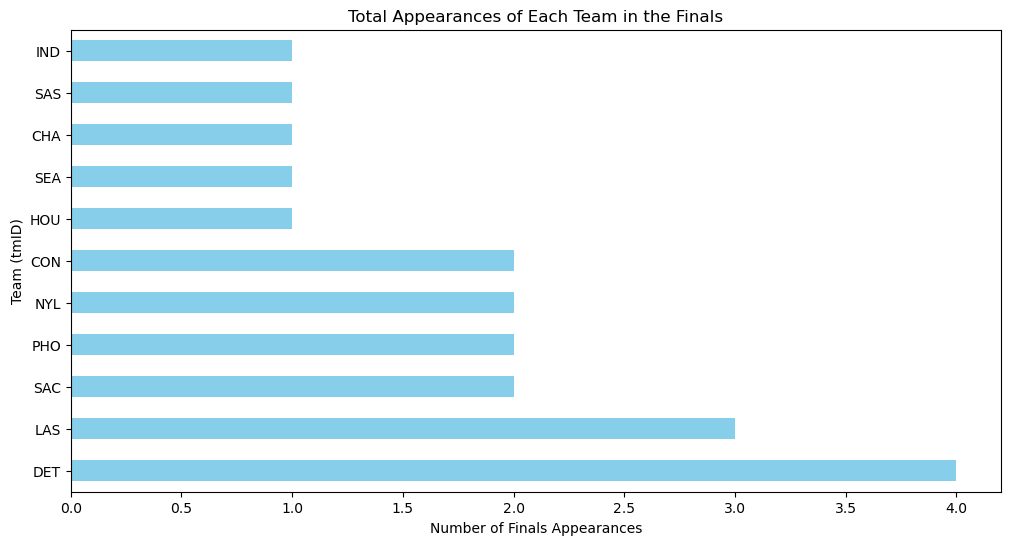

In [85]:
# Filter for the "F" (Finals) round
finals_data = series_post[series_post['round'] == 'F']

# Count how many times each team has appeared in the Finals as either a winner or a loser
team_appearances = pd.concat([finals_data['tmIDWinner'], finals_data['tmIDLoser']]).value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
team_appearances.plot(kind='barh', color='skyblue')

# Add labels and title
plt.ylabel('Team (tmID)')
plt.xlabel('Number of Finals Appearances')
plt.title('Total Appearances of Each Team in the Finals')

# Show the chart
plt.show()

### Coaches metrics

In [86]:
print(coaches['coachID'].nunique()) 

print(coaches.head())

coaches.isnull().sum()

57
      coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0  adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1  adubari99w     1  NYL  WNBA      0   20    12          4            3
2  adubari99w     2  NYL  WNBA      0   21    11          3            3
3  adubari99w     3  NYL  WNBA      0   18    14          4            4
4  adubari99w     4  NYL  WNBA      0   16    18          0            0


coachID        0
year           0
tmID           0
lgID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64

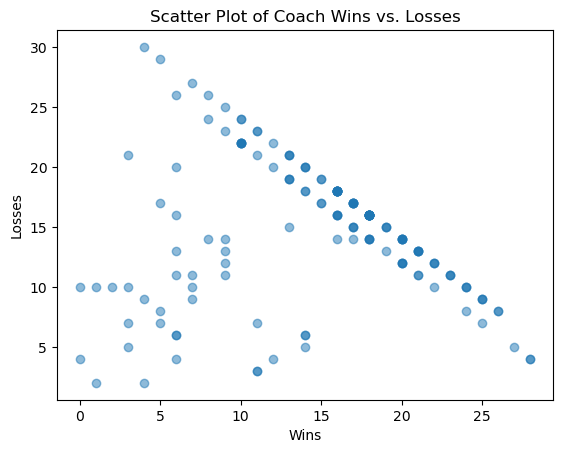

In [87]:
# Extract the wins and losses data from the "won" and "lost" columns
coach_wins = coaches['won']
coach_losses = coaches['lost']

# Create a scatter plot
import matplotlib.pyplot as plt

plt.scatter(coach_wins, coach_losses, alpha=0.5)
plt.xlabel('Wins')
plt.ylabel('Losses')
plt.title('Scatter Plot of Coach Wins vs. Losses')
plt.show()

## Feature Selection

Identify and select relevant features for your prediction model. Use techniques such as correlation analysis, recursive feature elimination, or feature importance from tree-based models.

### Teams dataset

In [88]:
original_teams = teams.copy()

In [89]:
# to delete: lgID, divID, seeded, tmORB, tmDRB, tmTRB, opptmORB, opptmDRB, opptmTRB, rank, firstRound, semis, finals
print(teams.isna().sum())
   
feature_selection_result = teams.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
feature_selection_result = feature_selection_result.drop(columns=['rank', 'firstRound', 'semis', 'finals'])
feature_selection_result = feature_selection_result.drop(columns=['min', 'o_oreb', 'o_dreb', 'd_oreb', 'd_dreb', 'name', 'franchID'])

feature_selection_result.head()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64


,year,tmID,confID,playoff,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,attend,arena
0,9,ATL,EA,N,895,2258,542,725,202,598,...,30,34,1,16,3,14,2,18,141379,Philips Arena
1,10,ATL,EA,Y,1089,2428,569,755,114,374,...,16,34,12,5,6,11,10,12,120737,Philips Arena
2,1,CHA,EA,N,812,1903,431,577,131,386,...,24,32,5,11,3,13,5,16,90963,Charlotte Coliseum
3,2,CHA,EA,Y,746,1780,410,528,153,428,...,14,32,11,5,7,9,15,6,105525,Charlotte Coliseum
4,3,CHA,EA,Y,770,1790,490,663,211,527,...,14,32,11,5,7,9,12,9,106670,Charlotte Coliseum


In [90]:
feature_selection_result.to_csv('filtered/feature_selection_dataset.csv', index=False)

## Feature Engineering

Create new features that might enhance the predictive power of your model. This could involve transforming existing features, creating interaction terms, or incorporating external data.

The feauture enginnering is done inside the `players.ipynb` file and the creation of the new dataset is done inside `create_final_team.csv` file.

In [91]:
# TODO: verificar se pode ficar assim ou se adicionamos o código cá
feature_engineering_result = pd.read_csv('filtered/feature_engineering_dataset.csv', delimiter=",")

### Shifting target variable

In [92]:
def shift_target_variable(dataset):
    dataset.sort_values(by=['tmID', 'year'], inplace=True)

    dataset['playoffs'] = dataset.groupby('tmID')['playoff'].shift(-1)

    dataset.drop(columns=['playoff'], inplace=True)

    dataset.dropna(subset=['playoffs'], inplace=True)

    dataset.rename(columns={'playoffs': 'playoff'}, inplace=True)

    dataset.reset_index(drop=True, inplace=True)

    return dataset

#### Original dataset

In [93]:
original_teams = shift_target_variable(original_teams)

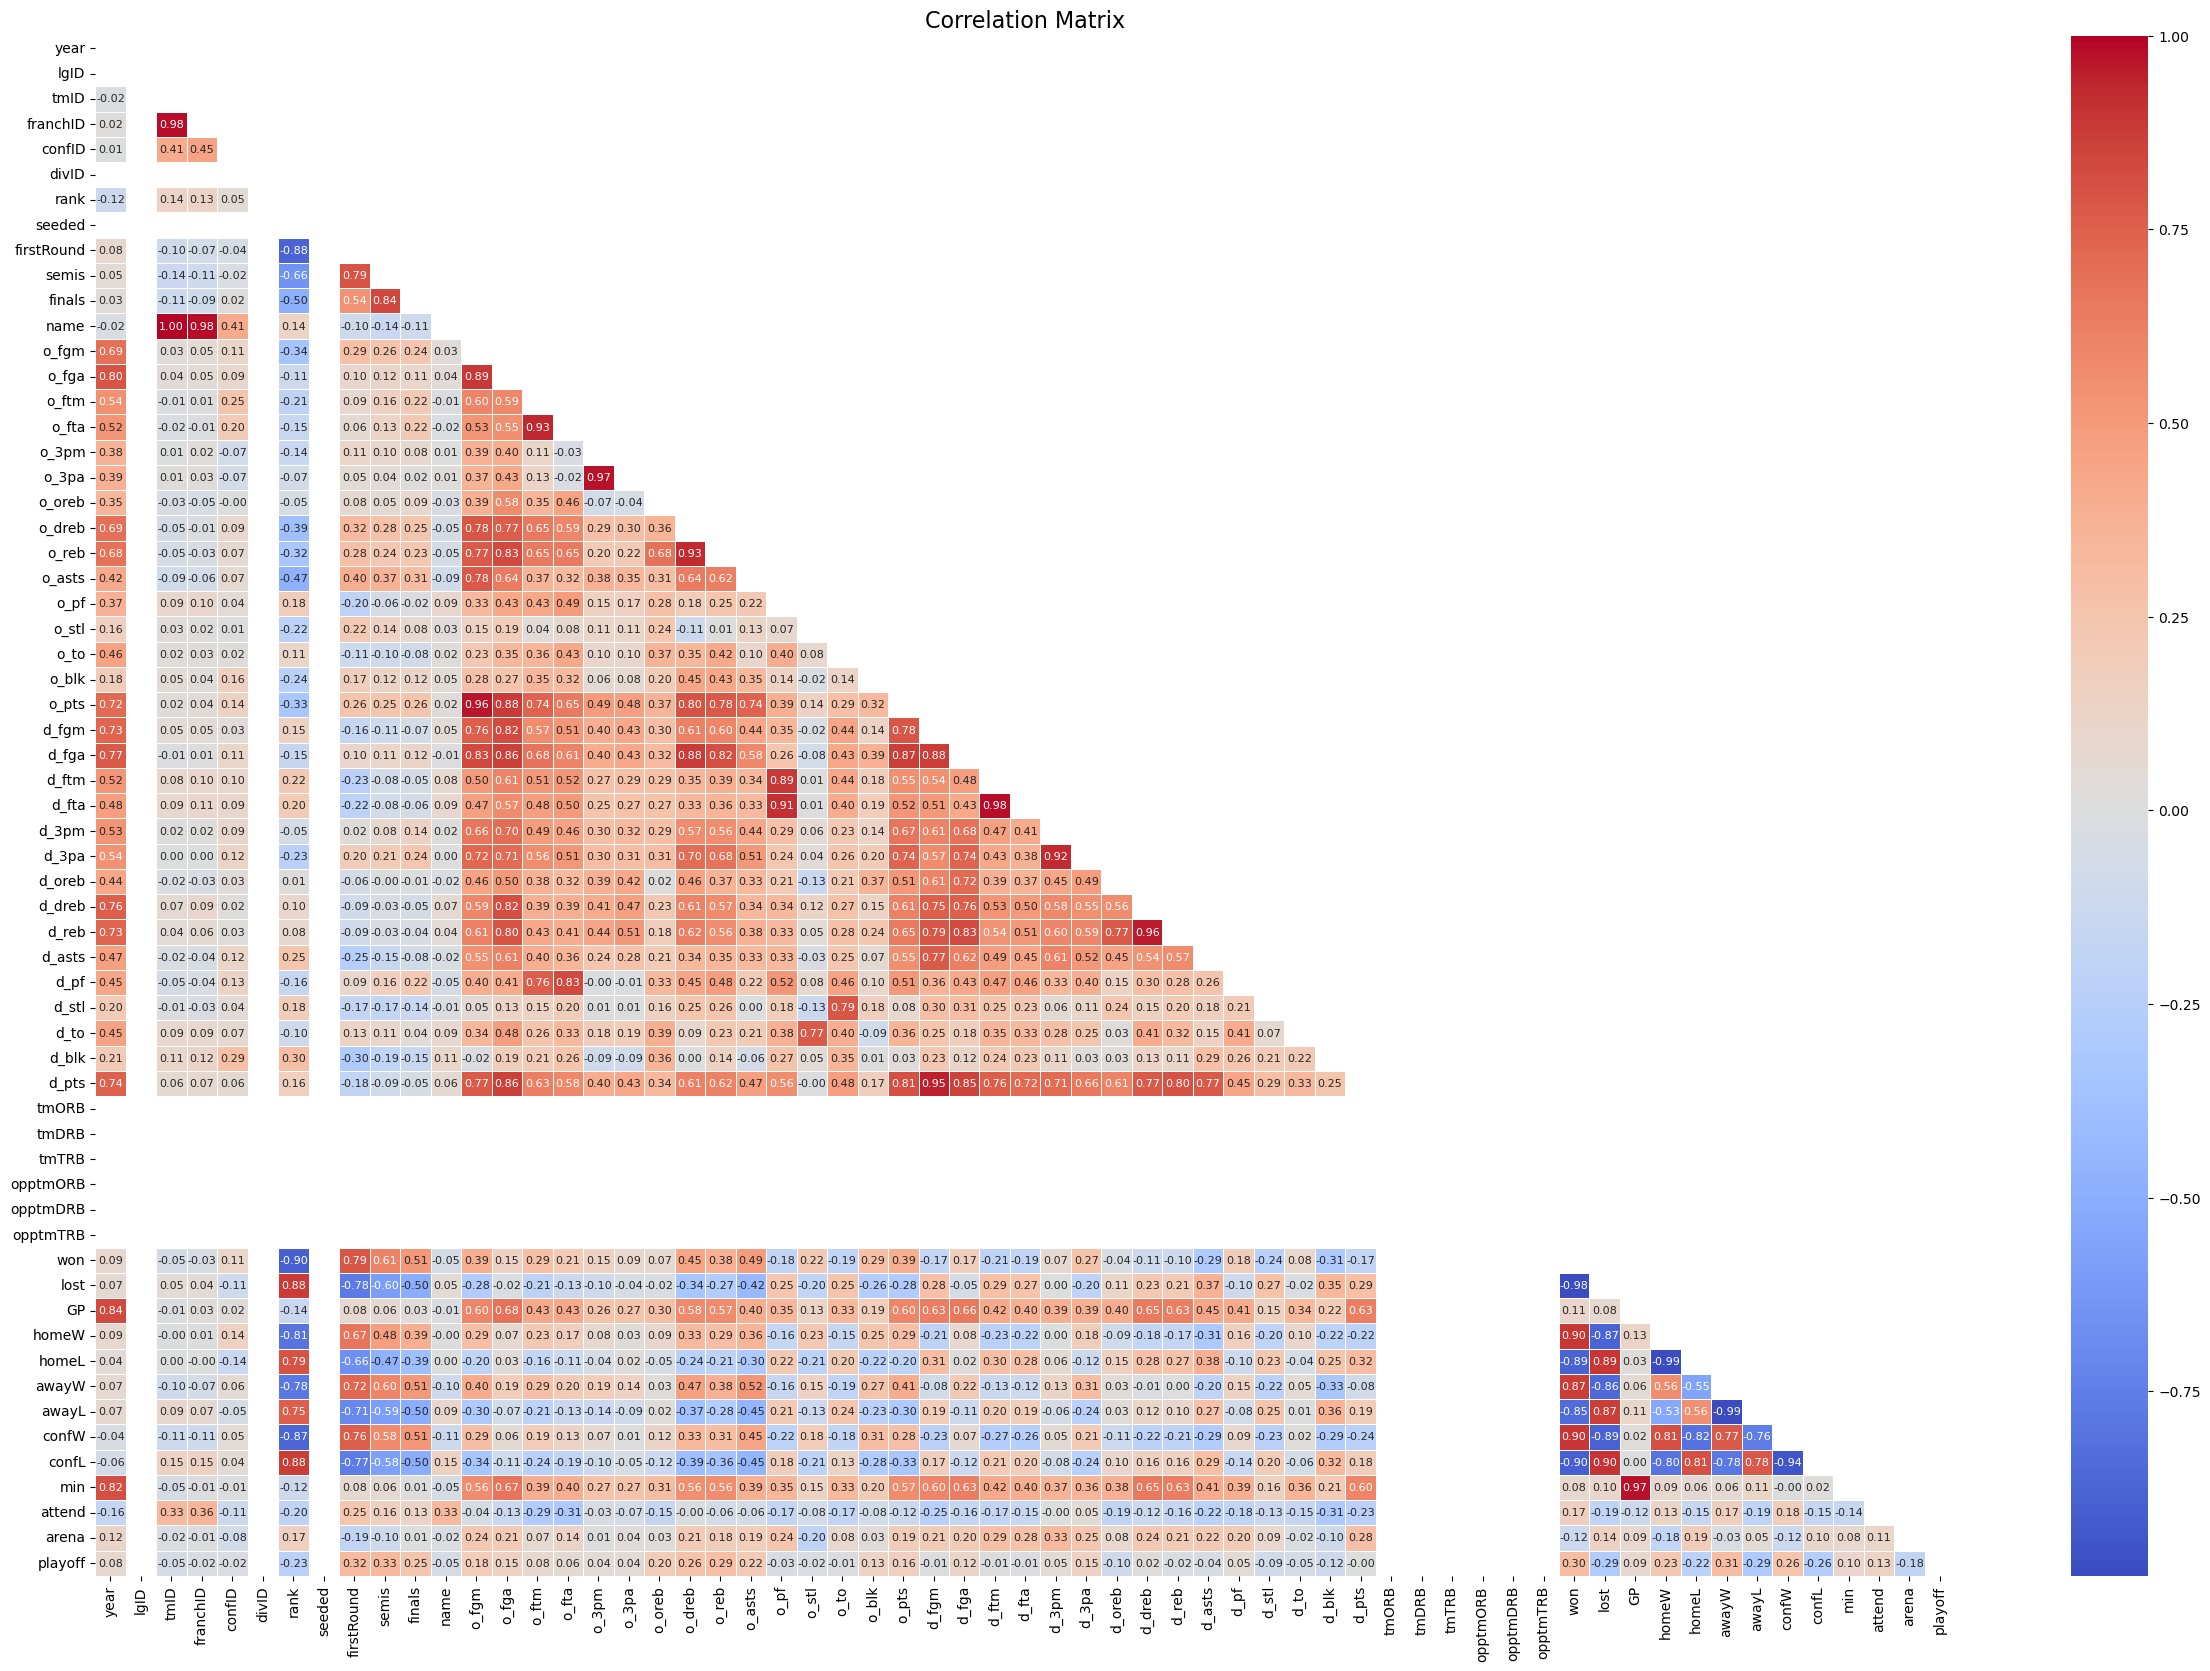

Correlation between target and year: 0.08230252844177124
Correlation between target and lgID: nan
Correlation between target and tmID: -0.05178357638364355
Correlation between target and franchID: -0.020666211177863592
Correlation between target and confID: -0.022078749693891626
Correlation between target and divID: nan
Correlation between target and rank: -0.23447156884008877
Correlation between target and seeded: nan
Correlation between target and firstRound: 0.31711626412189603
Correlation between target and semis: 0.3333984489762754
Correlation between target and finals: 0.2478110294883341
Correlation between target and name: -0.05178357638364355
Correlation between target and o_fgm: 0.18492263007459542
Correlation between target and o_fga: 0.1532758158447968
Correlation between target and o_ftm: 0.07627373558256371
Correlation between target and o_fta: 0.05847217028814615
Correlation between target and o_3pm: 0.03862976852446694
Correlation between target and o_3pa: 0.039844333897

{'year': 0.08230252844177124,
 'lgID': nan,
 'tmID': -0.05178357638364355,
 'franchID': -0.020666211177863592,
 'confID': -0.022078749693891626,
 'divID': nan,
 'rank': -0.23447156884008877,
 'seeded': nan,
 'firstRound': 0.31711626412189603,
 'semis': 0.3333984489762754,
 'finals': 0.2478110294883341,
 'name': -0.05178357638364355,
 'o_fgm': 0.18492263007459542,
 'o_fga': 0.1532758158447968,
 'o_ftm': 0.07627373558256371,
 'o_fta': 0.05847217028814615,
 'o_3pm': 0.03862976852446694,
 'o_3pa': 0.039844333897864334,
 'o_oreb': 0.19723591348627054,
 'o_dreb': 0.2649630650233743,
 'o_reb': 0.2867452917847479,
 'o_asts': 0.21545159323909865,
 'o_pf': -0.03180122331691405,
 'o_stl': -0.017810045979057804,
 'o_to': -0.014034761920402638,
 'o_blk': 0.13389451587659057,
 'o_pts': 0.1622401447944313,
 'd_fgm': -0.007473136711623956,
 'd_fga': 0.11639660605494026,
 'd_ftm': -0.007276259224512964,
 'd_fta': -0.014890420842086709,
 'd_3pm': 0.04634680830833249,
 'd_3pa': 0.14701784645321342,
 'd_o

In [94]:
original_teams_numeric = original_teams.copy()

for column in original_teams_numeric.columns:
    if original_teams_numeric[column].dtype == 'object':
        original_teams_numeric[column] = original_teams_numeric[column].astype('category').cat.codes

correlation_matrix(original_teams_numeric)

#### Feature Selection dataset

In [95]:
feature_selection_result = shift_target_variable(feature_selection_result)

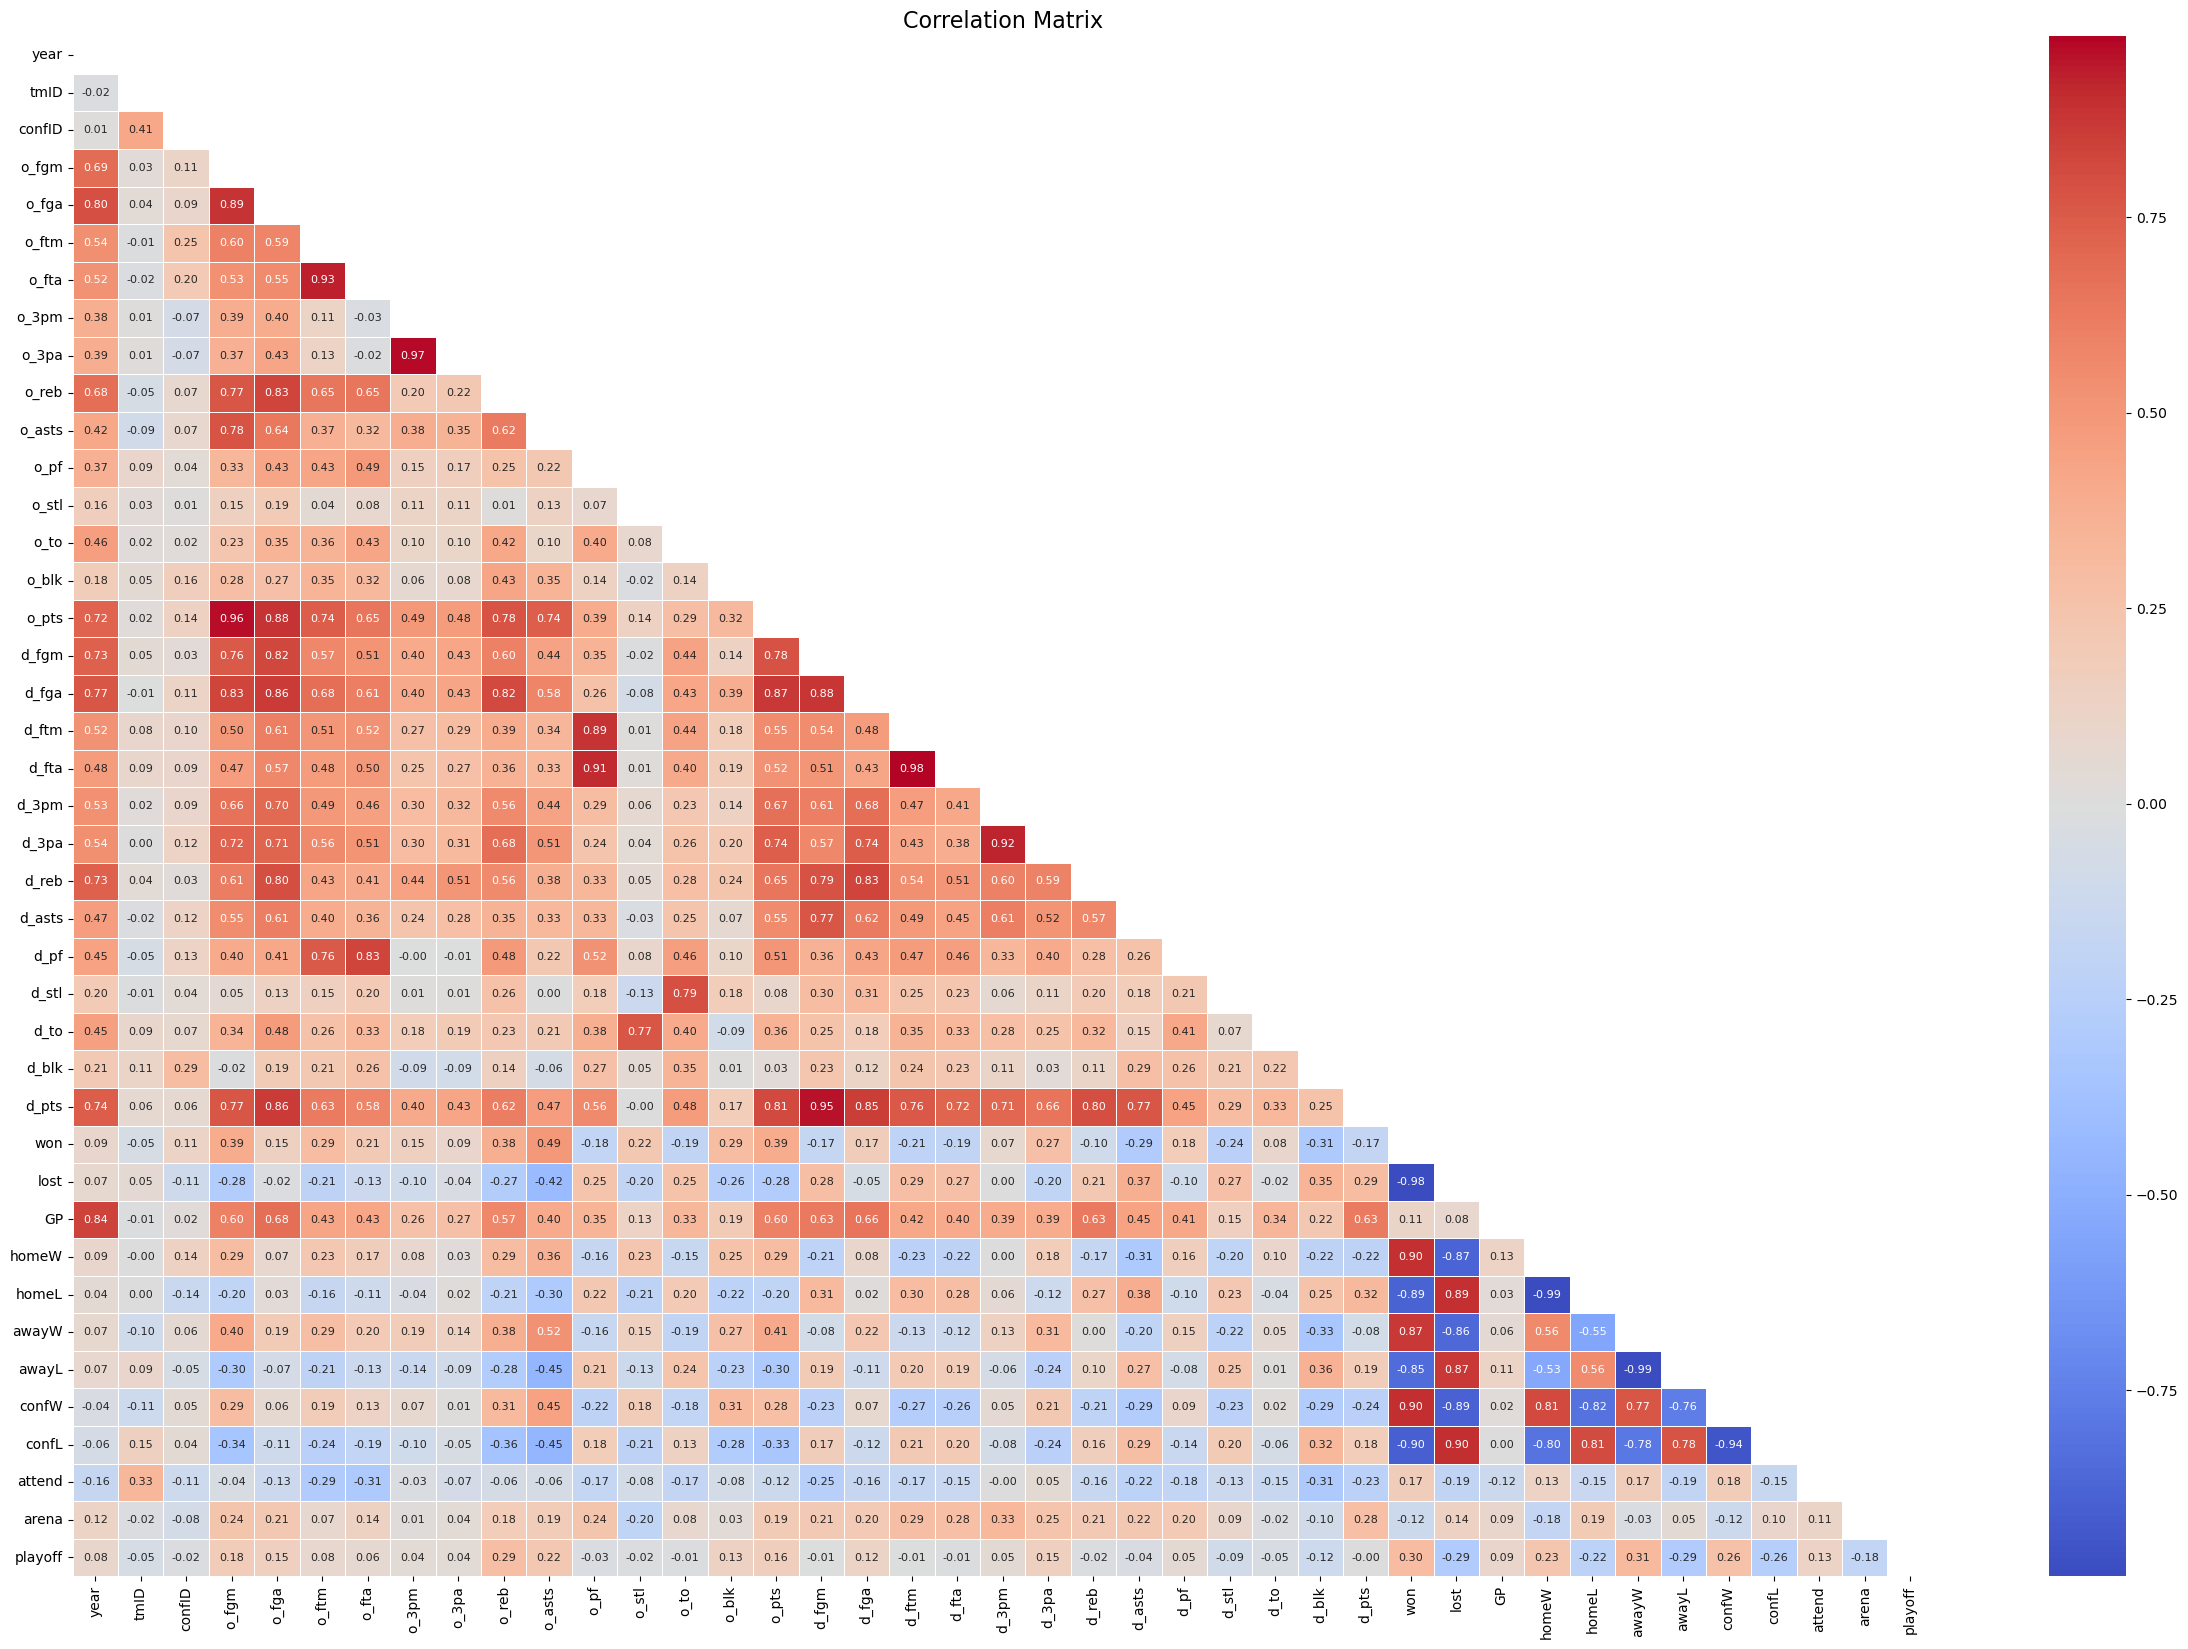

Correlation between target and year: 0.08230252844177124
Correlation between target and tmID: -0.05178357638364355
Correlation between target and confID: -0.022078749693891626
Correlation between target and o_fgm: 0.18492263007459542
Correlation between target and o_fga: 0.1532758158447968
Correlation between target and o_ftm: 0.07627373558256371
Correlation between target and o_fta: 0.05847217028814615
Correlation between target and o_3pm: 0.03862976852446694
Correlation between target and o_3pa: 0.039844333897864334
Correlation between target and o_reb: 0.2867452917847479
Correlation between target and o_asts: 0.21545159323909865
Correlation between target and o_pf: -0.03180122331691405
Correlation between target and o_stl: -0.017810045979057804
Correlation between target and o_to: -0.014034761920402638
Correlation between target and o_blk: 0.13389451587659057
Correlation between target and o_pts: 0.1622401447944313
Correlation between target and d_fgm: -0.007473136711623956
Correlat

{'year': 0.08230252844177124,
 'tmID': -0.05178357638364355,
 'confID': -0.022078749693891626,
 'o_fgm': 0.18492263007459542,
 'o_fga': 0.1532758158447968,
 'o_ftm': 0.07627373558256371,
 'o_fta': 0.05847217028814615,
 'o_3pm': 0.03862976852446694,
 'o_3pa': 0.039844333897864334,
 'o_reb': 0.2867452917847479,
 'o_asts': 0.21545159323909865,
 'o_pf': -0.03180122331691405,
 'o_stl': -0.017810045979057804,
 'o_to': -0.014034761920402638,
 'o_blk': 0.13389451587659057,
 'o_pts': 0.1622401447944313,
 'd_fgm': -0.007473136711623956,
 'd_fga': 0.11639660605494026,
 'd_ftm': -0.007276259224512964,
 'd_fta': -0.014890420842086709,
 'd_3pm': 0.04634680830833249,
 'd_3pa': 0.14701784645321342,
 'd_reb': -0.02262339469414288,
 'd_asts': -0.03989508677729073,
 'd_pf': 0.052357998682488645,
 'd_stl': -0.09163495786596285,
 'd_to': -0.04878124204737695,
 'd_blk': -0.1153277129562984,
 'd_pts': -0.0014733212963487492,
 'won': 0.30422410418136087,
 'lost': -0.28838437989404525,
 'GP': 0.090206787760913

In [96]:
feature_teams_numeric = feature_selection_result.copy()

for column in feature_teams_numeric.columns:
    if feature_teams_numeric[column].dtype == 'object':
        feature_teams_numeric[column] = feature_teams_numeric[column].astype('category').cat.codes

correlation_matrix(feature_teams_numeric)

#### Feature engineering dataset

In [97]:
eng1_teams_numeric = shift_target_variable(feature_engineering_result)

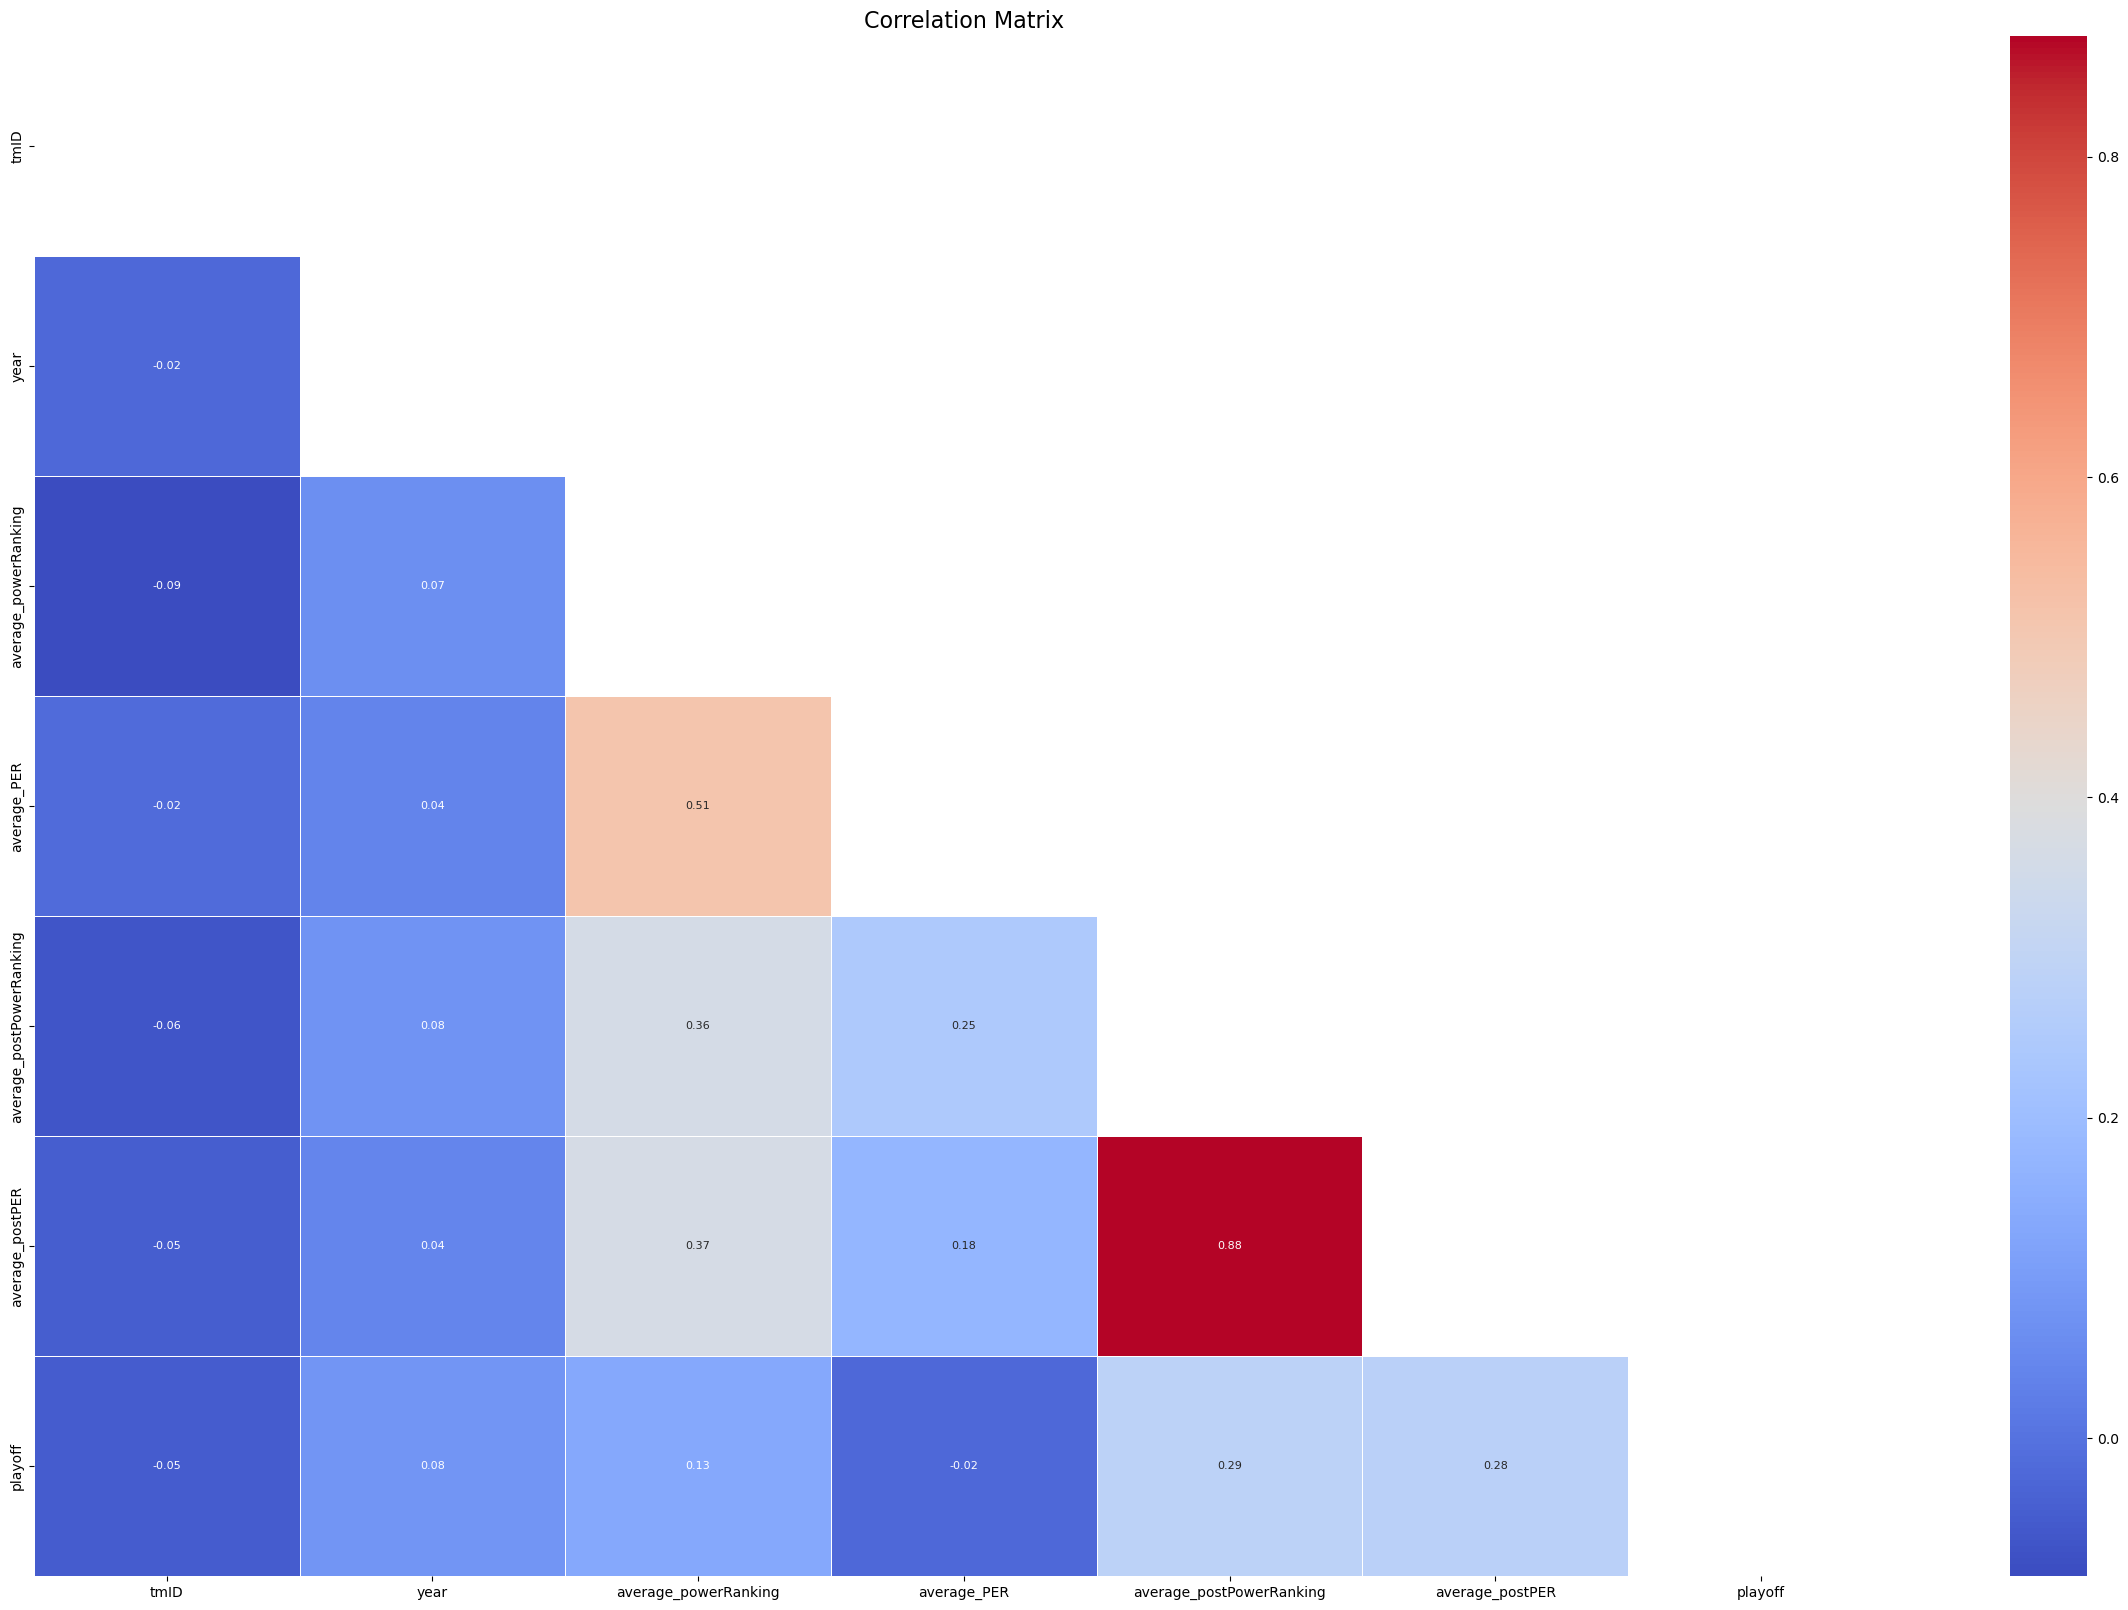

Correlation between target and tmID: -0.05178357638364355
Correlation between target and year: 0.08230252844177124
Correlation between target and average_powerRanking: 0.13288230722975408
Correlation between target and average_PER: -0.024054918852372917
Correlation between target and average_postPowerRanking: 0.2885303775750594
Correlation between target and average_postPER: 0.2797949764120654
Correlation between target and playoff: 1.0


{'tmID': -0.05178357638364355,
 'year': 0.08230252844177124,
 'average_powerRanking': 0.13288230722975408,
 'average_PER': -0.024054918852372917,
 'average_postPowerRanking': 0.2885303775750594,
 'average_postPER': 0.2797949764120654,
 'playoff': 1.0}

In [98]:
eng1_teams_numeric = eng1_teams_numeric.copy()

for column in eng1_teams_numeric.columns:
    if eng1_teams_numeric[column].dtype == 'object':
        eng1_teams_numeric[column] = eng1_teams_numeric[column].astype('category').cat.codes

correlation_matrix(eng1_teams_numeric)

In [99]:
feature_engineering_result2 = pd.read_csv('filtered/team2.csv', delimiter=",")
feature_engineering_result2.drop(columns=['playoff'], inplace=True)

feature_engineering_result2 = pd.merge(feature_engineering_result, feature_engineering_result2, on=['tmID', 'year'])

feature_engineering_result2.to_csv('text.csv', index=False)

feature_engineering_result2.head()

,tmID,year,average_powerRanking,average_PER,average_postPowerRanking,average_postPER,playoff,confID,rank,firstRound,...,defensivePersonalFoulsPerGame,defensiveStealsPerGame,defensiveTurnoversPerGame,defensiveBlocksPerGame,defensivePointsPerGame,winPercentage,homeWinPercentage,awayWinPercentage,conferenceWinPercentage,attendance
0,ATL,9,29.633309,9.870027,0.000000,0.000000,Y,EA,7,NaN,...,76.826722,83.088235,63.025210,44.853997,88.280370,0.000000,0.000000,15.609756,0.000000,41.539270
1,CHA,1,28.829439,8.725967,0.000000,0.000000,Y,EA,8,NaN,...,32.567850,57.490809,17.489496,42.316898,61.398467,17.475728,26.953125,17.073171,17.159763,16.531582
2,CHA,2,29.147918,7.990034,24.449715,5.867398,Y,EA,4,W,...,23.948703,55.928309,26.864496,43.130685,21.168582,58.737864,66.796875,50.243902,76.331361,23.754725
3,CHA,3,26.409079,11.487741,15.644127,3.313530,Y,EA,2,L,...,34.595884,17.647059,16.596639,26.041168,33.045977,58.737864,66.796875,50.243902,58.579882,24.322675
4,CHA,4,32.754543,10.408238,17.068615,10.071764,N,EA,2,L,...,19.564569,49.264706,24.369748,21.876496,26.617084,54.368932,75.000000,31.219512,49.704142,30.964971


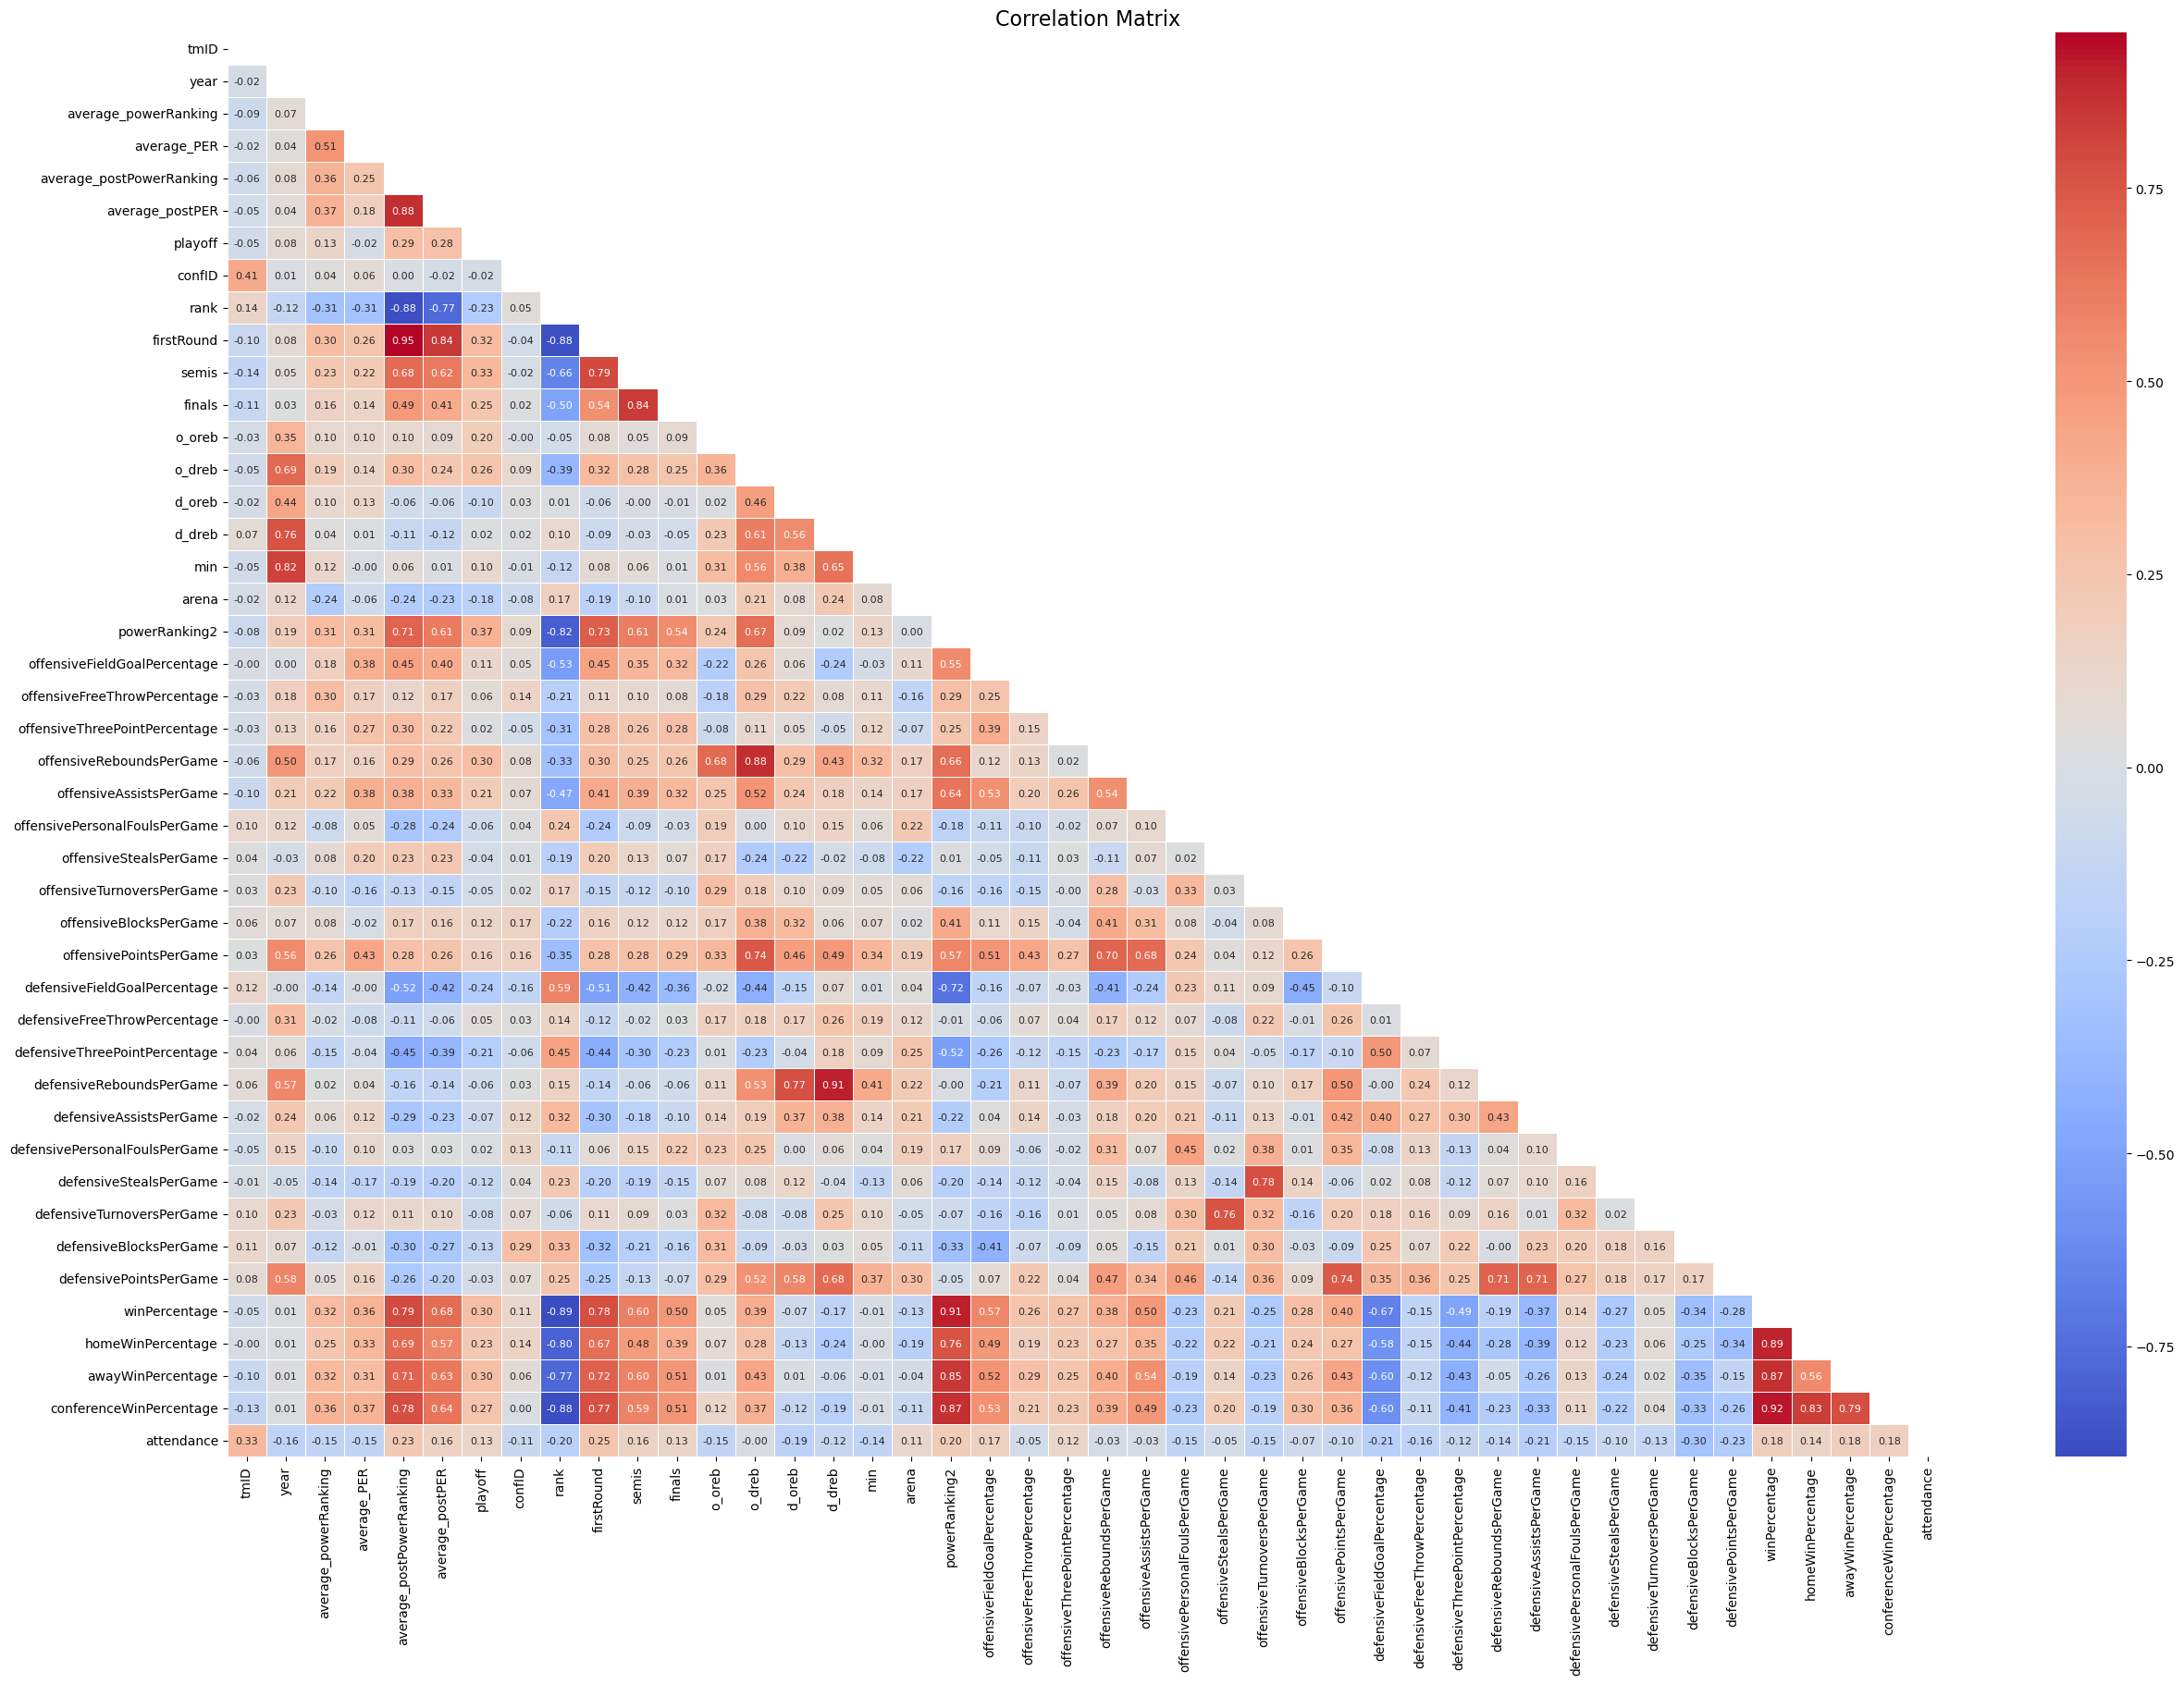

Correlation between target and tmID: -0.05178357638364355
Correlation between target and year: 0.08230252844177124
Correlation between target and average_powerRanking: 0.13288230722975408
Correlation between target and average_PER: -0.024054918852372917
Correlation between target and average_postPowerRanking: 0.2885303775750594
Correlation between target and average_postPER: 0.2797949764120654
Correlation between target and playoff: 1.0
Correlation between target and confID: -0.022078749693891658
Correlation between target and rank: -0.2344715688400887
Correlation between target and firstRound: 0.3171162641218959
Correlation between target and semis: 0.33339844897627546
Correlation between target and finals: 0.2478110294883341
Correlation between target and o_oreb: 0.1972359134862705
Correlation between target and o_dreb: 0.2649630650233744
Correlation between target and d_oreb: -0.10232115132727779
Correlation between target and d_dreb: 0.016927936334465484
Correlation between target 

{'tmID': -0.05178357638364355,
 'year': 0.08230252844177124,
 'average_powerRanking': 0.13288230722975408,
 'average_PER': -0.024054918852372917,
 'average_postPowerRanking': 0.2885303775750594,
 'average_postPER': 0.2797949764120654,
 'playoff': 1.0,
 'confID': -0.022078749693891658,
 'rank': -0.2344715688400887,
 'firstRound': 0.3171162641218959,
 'semis': 0.33339844897627546,
 'finals': 0.2478110294883341,
 'o_oreb': 0.1972359134862705,
 'o_dreb': 0.2649630650233744,
 'd_oreb': -0.10232115132727779,
 'd_dreb': 0.016927936334465484,
 'min': 0.09959604664638172,
 'arena': -0.18191310143996453,
 'powerRanking2': 0.37423833600355005,
 'offensiveFieldGoalPercentage': 0.11472484003550586,
 'offensiveFreeThrowPercentage': 0.06025810151714162,
 'offensiveThreePointPercentage': 0.018143642248644357,
 'offensiveReboundsPerGame': 0.3026581547809564,
 'offensiveAssistsPerGame': 0.2064322212934678,
 'offensivePersonalFoulsPerGame': -0.06415233220893332,
 'offensiveStealsPerGame': -0.042062685545

In [100]:
eng2_teams_numeric = feature_engineering_result2.copy()

for column in eng2_teams_numeric.columns:
    if eng2_teams_numeric[column].dtype == 'object':
        eng2_teams_numeric[column] = eng2_teams_numeric[column].astype('category').cat.codes

correlation_matrix(eng2_teams_numeric)

In [101]:
continuous = ['year', 'average_powerRanking', 'average_PER', 'average_postPowerRanking', 'average_postPER']

In [102]:
eng2_teams_numeric.head()

,tmID,year,average_powerRanking,average_PER,average_postPowerRanking,average_postPER,playoff,confID,rank,firstRound,...,defensivePersonalFoulsPerGame,defensiveStealsPerGame,defensiveTurnoversPerGame,defensiveBlocksPerGame,defensivePointsPerGame,winPercentage,homeWinPercentage,awayWinPercentage,conferenceWinPercentage,attendance
0,0,9,29.633309,9.870027,0.000000,0.000000,1,0,7,-1,...,76.826722,83.088235,63.025210,44.853997,88.280370,0.000000,0.000000,15.609756,0.000000,41.539270
1,1,1,28.829439,8.725967,0.000000,0.000000,1,0,8,-1,...,32.567850,57.490809,17.489496,42.316898,61.398467,17.475728,26.953125,17.073171,17.159763,16.531582
2,1,2,29.147918,7.990034,24.449715,5.867398,1,0,4,1,...,23.948703,55.928309,26.864496,43.130685,21.168582,58.737864,66.796875,50.243902,76.331361,23.754725
3,1,3,26.409079,11.487741,15.644127,3.313530,1,0,2,0,...,34.595884,17.647059,16.596639,26.041168,33.045977,58.737864,66.796875,50.243902,58.579882,24.322675
4,1,4,32.754543,10.408238,17.068615,10.071764,0,0,2,0,...,19.564569,49.264706,24.369748,21.876496,26.617084,54.368932,75.000000,31.219512,49.704142,30.964971


## Classification

### Encoding

#### Original

In [103]:
#tmID, confID, playoff, arena
# name, franchID, lgID, divID

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the columns 'teamID', 'franchID', 'confID', 'name', 'arena'
original_teams['tmID'] = label_encoder.fit_transform(original_teams['tmID'])
original_teams['confID'] = label_encoder.fit_transform(original_teams['confID'])
original_teams['arena'] = label_encoder.fit_transform(original_teams['arena'])
original_teams['name'] = label_encoder.fit_transform(original_teams['name'])
original_teams['franchID'] = label_encoder.fit_transform(original_teams['franchID'])
original_teams['lgID'] = label_encoder.fit_transform(original_teams['lgID'])
original_teams['divID'] = label_encoder.fit_transform(original_teams['divID'])
original_teams['firstRound'] = label_encoder.fit_transform(original_teams['firstRound'])
original_teams['semis'] = label_encoder.fit_transform(original_teams['semis'])
original_teams['finals'] = label_encoder.fit_transform(original_teams['finals'])

#### After Feature Selection

In [104]:
feature_selection_result['tmID'] = label_encoder.fit_transform(feature_selection_result['tmID'])
feature_selection_result['confID'] = label_encoder.fit_transform(feature_selection_result['confID'])
feature_selection_result['arena'] = label_encoder.fit_transform(feature_selection_result['arena'])

#### After feature engineering

In [105]:
# Apply label encoding to the columns 'teamID'
feature_engineering_result['tmID'] = label_encoder.fit_transform(feature_engineering_result['tmID'])

In [106]:
feature_engineering_result2['tmID'] = label_encoder.fit_transform(feature_engineering_result2['tmID'])
feature_engineering_result2['confID'] = label_encoder.fit_transform(feature_engineering_result2['confID'])
feature_engineering_result2['arena'] = label_encoder.fit_transform(feature_engineering_result2['arena'])
feature_engineering_result2['firstRound'] = label_encoder.fit_transform(feature_engineering_result2['firstRound'])
feature_engineering_result2['semis'] = label_encoder.fit_transform(feature_engineering_result2['semis'])
feature_engineering_result2['finals'] = label_encoder.fit_transform(feature_engineering_result2['finals'])

### Models

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

#### Decision Tree

In [108]:
def decision_tree_model(dataset, year): 
    X = dataset.copy()
    y = dataset['playoff'].copy()

    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])  
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])  
    y_test = dataset[dataset['year'] == year]['playoff']

    model = DecisionTreeClassifier(random_state=42)

    max_features = len(X.columns)

    num_features_list = []
    accuracy_list = []

    for num_features_to_select in range(1, max_features + 1):
        # Create RFE model
        rfe = RFE(model, n_features_to_select=num_features_to_select)

        # Fit RFE model on training data
        rfe.fit(X_train, y_train)

        # Get the selected features
        selected_features = X_train.columns[rfe.support_]

        # Train a model using the selected features
        model.fit(X_train[selected_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[selected_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        num_features_list.append(num_features_to_select)
        accuracy_list.append(accuracy)

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({
        'Num Features Selected': num_features_list,
        'Accuracy': accuracy_list
    })

    # Display the results
    print(results_df)


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    print(classification_report(y_test, y_pred))
    
    # Define the hyperparameters and their possible values
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    scoring = 'accuracy'
    
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
    
    # Fit the model to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    print("Best Hyperparameters:", best_params)
    print("Validation Accuracy:", accuracy)


##### Original dataset

In [109]:
decision_tree_model(original_teams, 9)

    Num Features Selected  Accuracy
0                       1  0.692308
1                       2  0.384615
2                       3  0.307692
3                       4  0.153846
4                       5  0.461538
..                    ...       ...
56                     57  0.461538
57                     58  0.461538
58                     59  0.538462
59                     60  0.461538
60                     61  0.461538

[61 rows x 2 columns]
Accuracy: 0.46
              precision    recall  f1-score   support

           N       0.25      0.20      0.22         5
           Y       0.56      0.62      0.59         8

    accuracy                           0.46        13
   macro avg       0.40      0.41      0.41        13
weighted avg       0.44      0.46      0.45        13

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Validation Accuracy: 0.46153846153846156


##### Feature Selection dataset

In [110]:
decision_tree_model(feature_selection_result, 9)

    Num Features Selected  Accuracy
0                       1  0.692308
1                       2  0.461538
2                       3  0.692308
3                       4  0.461538
4                       5  0.615385
5                       6  0.615385
6                       7  0.615385
7                       8  0.692308
8                       9  0.615385
9                      10  0.692308
10                     11  0.692308
11                     12  0.615385
12                     13  0.615385
13                     14  0.692308
14                     15  0.692308
15                     16  0.692308
16                     17  0.615385
17                     18  0.615385
18                     19  0.538462
19                     20  0.615385
20                     21  0.692308
21                     22  0.769231
22                     23  0.615385
23                     24  0.615385
24                     25  0.615385
25                     26  0.615385
26                     27  0

##### Feature engineering dataset

In [111]:
decision_tree_model(feature_engineering_result, 9)

   Num Features Selected  Accuracy
0                      1  0.384615
1                      2  0.307692
2                      3  0.461538
3                      4  0.615385
4                      5  0.461538
5                      6  0.615385
6                      7  0.615385
Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.80      0.62         5
           Y       0.80      0.50      0.62         8

    accuracy                           0.62        13
   macro avg       0.65      0.65      0.62        13
weighted avg       0.68      0.62      0.62        13

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Validation Accuracy: 0.46153846153846156


In [112]:
decision_tree_model(feature_engineering_result2, 9)

    Num Features Selected  Accuracy
0                       1  0.384615
1                       2  0.384615
2                       3  0.615385
3                       4  0.538462
4                       5  0.615385
5                       6  0.461538
6                       7  0.615385
7                       8  0.615385
8                       9  0.615385
9                      10  0.692308
10                     11  0.538462
11                     12  0.692308
12                     13  0.615385
13                     14  0.538462
14                     15  0.615385
15                     16  0.692308
16                     17  0.692308
17                     18  0.692308
18                     19  0.692308
19                     20  0.615385
20                     21  0.615385
21                     22  0.615385
22                     23  0.692308
23                     24  0.692308
24                     25  0.615385
25                     26  0.615385
26                     27  0

#### Random Forest

In [113]:
def random_forest_model(dataset, year): 
    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    rf_model = RandomForestClassifier(random_state=42)

    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

    print(classification_report(y_test, y_pred_rf))
    
    # Define the hyperparameters and their possible values
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Choose an evaluation metric
    scoring = 'accuracy'

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring, cv=5)

    # Fit the model to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    print("Best Hyperparameters:", best_params)
    print("Validation Accuracy:", accuracy)

##### Original dataset

In [114]:
random_forest_model(original_teams, 9)

Random Forest Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.40      0.44         5
           Y       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Validation Accuracy: 0.5384615384615384


##### Feature Selection dataset

In [115]:
random_forest_model(feature_selection_result, 9)

Random Forest Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.40      0.40      0.40         5
           Y       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Validation Accuracy: 0.46153846153846156


##### Feature engineering dataset

In [116]:
random_forest_model(feature_engineering_result, 9)

Random Forest Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.40      0.44         5
           Y       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Validation Accuracy: 0.46153846153846156


In [117]:
random_forest_model(feature_engineering_result2, 9)

Random Forest Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.33      0.20      0.25         5
           Y       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Validation Accuracy: 0.5384615384615384


#### Logistic Regression

In [118]:
def logistic_regression_model(dataset, year): 
    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    logreg_model = LogisticRegression(random_state=42)

    logreg_model.fit(X_train, y_train)

    y_pred_logreg = logreg_model.predict(X_test)

    accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

    print(classification_report(y_test, y_pred_logreg))
    
    # Define the hyperparameters and their possible values
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag'],
        'tol': [1e-4, 1e-5, 1e-6]
    }

    # Choose an evaluation metric
    scoring = 'accuracy'

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring=scoring, cv=5)

    # Fit the model to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    print("Best Hyperparameters:", best_params)
    print("Validation Accuracy:", accuracy)

##### Original dataset

In [119]:
logistic_regression_model(original_teams, 9)

Logistic Regression Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.43      0.60      0.50         5
           Y       0.67      0.50      0.57         8

    accuracy                           0.54        13
   macro avg       0.55      0.55      0.54        13
weighted avg       0.58      0.54      0.54        13



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Validation Accuracy: 0.5384615384615384


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

##### Feature Selection dataset

In [120]:
logistic_regression_model(feature_selection_result, 9)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

Logistic Regression Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.60      0.55         5
           Y       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Validation Accuracy: 0.46153846153846156


/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/lib/python3/dist-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optim

##### Feature Engineering dataset

In [121]:
logistic_regression_model(feature_engineering_result, 9)

Logistic Regression Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.33      0.20      0.25         5
           Y       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Validation Accuracy: 0.5384615384615384


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [122]:
logistic_regression_model(feature_engineering_result2, 9)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.43      0.60      0.50         5
           Y       0.67      0.50      0.57         8

    accuracy                           0.54        13
   macro avg       0.55      0.55      0.54        13
weighted avg       0.58      0.54      0.54        13



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}
Validation Accuracy: 0.5384615384615384


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting err

#### Support Vector Machines (SVM)

In [123]:
def svm_model(dataset, year): 
    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm_model = SVC(random_state=42)

    svm_model.fit(X_train_scaled, y_train)

    y_pred_svm = svm_model.predict(X_test_scaled)

    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}")

    print(classification_report(y_test, y_pred_svm))
    
    # Define the hyperparameters and their possible values
    # param_grid = {
    #    'C': [0.1, 1, 10],
    #    'kernel': ['linear', 'rbf', 'poly'],
    #    'gamma': ['auto', 'scale', 0.1, 1],
    #    'degree': [2, 3, 4]
    #}

    # Choose an evaluation metric
    #scoring = 'accuracy'

    # Create a GridSearchCV object
    #grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scoring, cv=5)

    # Fit the model to the data
    #grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    #best_params = grid_search.best_params_

    # Get the best model
    #best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    #y_val_pred = best_model.predict(X_test)
    #accuracy = accuracy_score(y_test, y_val_pred)

    #print("Best Hyperparameters:", best_params)
    #print("Validation Accuracy:", accuracy)

##### Original dataset

In [124]:
svm_model(original_teams, 9)

Support Vector Machine Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.40      0.44         5
           Y       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13



##### Feature Selection dataset

In [125]:
svm_model(feature_selection_result, 9)

Support Vector Machine Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.40      0.44         5
           Y       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13



##### Feature engineering dataset

In [126]:
svm_model(feature_engineering_result, 9)

Support Vector Machine Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.40      0.40      0.40         5
           Y       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13



In [127]:
svm_model(feature_engineering_result2, 9)

Support Vector Machine Accuracy: 0.54
              precision    recall  f1-score   support

           N       0.40      0.40      0.40         5
           Y       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13



#### KNN dataset

In [128]:
def knn_model(dataset, year, n_neighbors=3):
    # Separate the training and testing sets
    X_train = dataset[dataset['year'] < year].drop(columns=['playoff'])
    y_train = dataset[dataset['year'] < year]['playoff']

    X_test = dataset[dataset['year'] == year].drop(columns=['playoff'])
    y_test = dataset[dataset['year'] == year]['playoff']

    # Create and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_knn = knn_model.predict(X_test)

    # Evaluate and print the model performance
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN Accuracy: {accuracy_knn:.2f}")

    print(classification_report(y_test, y_pred_knn))
    
    # Define the hyperparameters and their possible values
    param_grid = {
        'n_neighbors': [1, 3, 5, 10],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    # Choose an evaluation metric
    scoring = 'accuracy'

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring=scoring, cv=5)

    # Fit the model to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_val_pred)

    print("Best Hyperparameters:", best_params)
    print("Validation Accuracy:", accuracy)

##### Original dataset

In [129]:
knn_model(original_teams, 9)

KNN Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.60      0.55         5
           Y       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



Best Hyperparameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Validation Accuracy: 0.6923076923076923


##### Feature Selection dataset

In [130]:
knn_model(feature_selection_result, 9)

KNN Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.60      0.55         5
           Y       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Validation Accuracy: 0.6923076923076923


##### Feature engineering dataset

In [131]:
knn_model(feature_engineering_result, 9)

KNN Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.60      0.55         5
           Y       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Validation Accuracy: 0.5384615384615384


In [132]:
knn_model(feature_engineering_result2, 9)

KNN Accuracy: 0.62
              precision    recall  f1-score   support

           N       0.50      0.20      0.29         5
           Y       0.64      0.88      0.74         8

    accuracy                           0.62        13
   macro avg       0.57      0.54      0.51        13
weighted avg       0.58      0.62      0.56        13

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Validation Accuracy: 0.5384615384615384


## Model Evaluation